In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests

import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

%matplotlib inline
plt.style.use('ggplot')

In [7]:
df = pd.read_csv("df_election_and_results_final.csv")
df.drop(df.columns[[0, 1, 7]], axis = 1, inplace = True)
df["candidatevotes_log"]= df["candidatevotes"].apply(np.log)
df["transaction_amt_log"]= df["transaction_amt"].apply(np.log)
df['election_year'] = pd.to_datetime(df['election_year'], format= '%Y')

In [8]:
df['swing'] = df['swing'].astype(int)
df['battleground_bool'] = df['battleground_bool'].astype(int)
df['shift_bool'] = df['shift_bool'].astype(int)
df['bellweather_bool'] = df['bellweather_bool'].astype(int)

In [24]:
df_dem = df.loc[df.party_simplified.isin(['DEMOCRAT'])].reset_index(drop=True)
df_rep = df.loc[df.party_simplified.isin(['REPUBLICAN'])].reset_index(drop=True)
df_rep_dem = df.loc[df.party_simplified.isin(['REPUBLICAN', 'DEMOCRAT'])].reset_index(drop=True)

In [25]:
#bucketing Midatlantic, northeast, pacific coast in group_r
#midwest, rockymountain in group_m
#southeast,southwest in group_d
group_dic ={"MIDATLANTIC" : "GROUP_D", 
                 "NORTHEAST" :"GROUP_D", 
                 "PACIFIC COAST" : "GROUP_D",
                 "ROCKY MOUNTAINS":"GROUP_M",
                 "MIDWEST":"GROUP_M",
                 "SOUTHEAST":"GROUP_R",
                 "SOUTHWEST":"GROUP_R"} 

df_dem['group'] = df_dem['region'].map(group_dic) 
df_rep['group'] = df_rep['region'].map(group_dic) 
df['group'] = df['region'].map(group_dic) 
df_rep_dem['group'] = df_rep_dem['region'].map(group_dic) 

In [4]:
df.head()

election_year state_x  transaction_amt  totalspend_yr_st  spend_share  \
0    2004-01-01      CA          4310.65           8190.85    52.627627   
1    2004-01-01      CA          3880.20           8190.85    47.372373   
2    2004-01-01      CO           332.39            332.39   100.000000   
3    2004-01-01      DC        110613.46         118567.63    93.291449   
4    2004-01-01      DC          2547.27         118567.63     2.148369   

  party_simplified  candidatevotes  percentvote  writein_sum  totalvotes  ...  \
0         DEMOCRAT         6745485    54.305558            0    12421353  ...   
1            OTHER          166042     1.336746            1    12421353  ...   
2            OTHER           26643     1.251062            0     2129630  ...   
3         DEMOCRAT          202970    89.183869            0      227586  ...   
4            OTHER            3360     1.476365            1      227586  ...   

   shift_bool  shift_int bellweather_bool  bellweather_pct  swing  \
0           0          0                0            50.00      0   
1           0          0                0            50.00      0   
2           1          2                1            71.43      1   
3           0          0                0            50.00      0   
4           0          0                0            50.00      0   

   democrat_lean_pct  percent_of_total_spend  spend_per_vote  \
0             100.00                    2.57        0.063904   
1             100.00                   54.98        2.336879   
2              57.14                    1.48        1.247570   
3             100.00                   22.65       54.497443   
4             100.00                   13.59       75.811607   

   candidatevotes_log  transaction_amt_log  
0           15.724384             8.368844  
1           12.019996             8.263642  
2           10.190282             5.806309  
3           12.220813            11.613797  
4            8.119696             7.842777  

[5 rows x 25 columns]

In [5]:
df.dtypes

election_year                  datetime64[ns]
state_x                                object
transaction_amt                       float64
totalspend_yr_st                      float64
spend_share                           float64
party_simplified                       object
candidatevotes                          int64
percentvote                           float64
writein_sum                             int64
totalvotes                              int64
writein_mean                          float64
won                                   float64
region                                 object
battleground_bool                       int64
battleground_margin_avg_pct           float64
shift_bool                              int64
shift_int                               int64
bellweather_bool                        int64
bellweather_pct                       float64
swing                                   int64
democrat_lean_pct                     float64
percent_of_total_spend            

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   election_year                496 non-null    datetime64[ns]
 1   state_x                      496 non-null    object        
 2   transaction_amt              496 non-null    float64       
 3   totalspend_yr_st             496 non-null    float64       
 4   spend_share                  496 non-null    float64       
 5   party_simplified             496 non-null    object        
 6   candidatevotes               496 non-null    int64         
 7   percentvote                  496 non-null    float64       
 8   writein_sum                  496 non-null    int64         
 9   totalvotes                   496 non-null    int64         
 10  writein_mean                 496 non-null    float64       
 11  won                          496 non-null    

array([[<AxesSubplot:title={'center':'transaction_amt'}>,
        <AxesSubplot:title={'center':'candidatevotes'}>]], dtype=object)

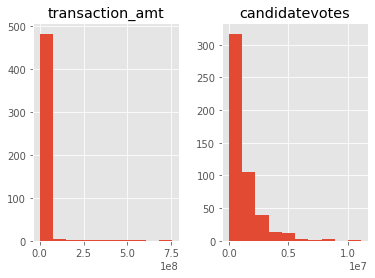

In [85]:
df.hist(column=['transaction_amt','candidatevotes'])

array([[<AxesSubplot:title={'center':'transaction_amt_log'}>,
        <AxesSubplot:title={'center':'candidatevotes_log'}>]],
      dtype=object)

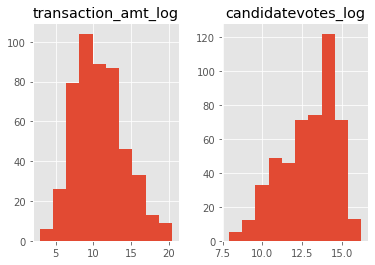

In [84]:
df.hist(column=['transaction_amt_log','candidatevotes_log'])

array([[<AxesSubplot:title={'center':'spend_share'}>,
        <AxesSubplot:title={'center':'percentvote'}>]], dtype=object)

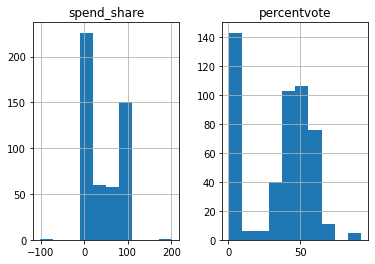

In [8]:
df.hist(column=['spend_share','percentvote'])

<AxesSubplot:xlabel='election_year'>

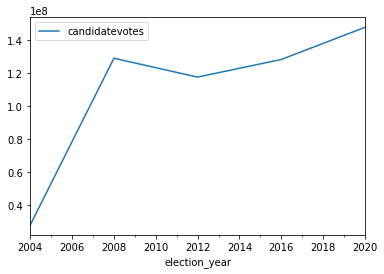

In [9]:
df.groupby(['election_year']).sum('candidatevotes').reset_index().plot('election_year', 'candidatevotes')

<AxesSubplot:xlabel='election_year'>

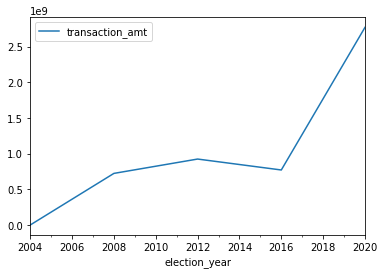

In [10]:
df.groupby(['election_year']).sum('transaction_amt').reset_index().plot('election_year', 'transaction_amt')

In [11]:
df.describe()

transaction_amt  totalspend_yr_st  spend_share  candidatevotes  \
count     4.960000e+02      4.960000e+02   496.000000    4.960000e+02   
mean      1.047201e+07      3.112829e+07    42.943548    1.109958e+06   
std       6.292500e+07      1.092864e+08    41.534560    1.419788e+06   
min      -3.780253e+04      8.084000e+01  -101.598712    2.686000e+03   
25%       3.880403e+03      3.523706e+04     2.160185    1.149282e+05   
50%       3.284834e+04      3.281841e+05    28.421791    5.647205e+05   
75%       3.724054e+05      5.913158e+06    88.921597    1.587116e+06   
max       7.546014e+08      7.556564e+08   201.598712    1.111025e+07   

       percentvote  writein_sum    totalvotes  writein_mean         won  \
count   496.000000   496.000000  4.960000e+02    496.000000  496.000000   
mean     35.225091     0.530242  3.226617e+06      0.080106    0.353831   
std      22.900730     2.100287  3.005283e+06      0.192871    0.478112   
min       0.479290     0.000000  2.275860e+05      0.000000    0.000000   
25%       5.437520     0.000000  1.017440e+06      0.000000    0.000000   
50%      42.231767     0.000000  2.569516e+06      0.000000    0.000000   
75%      52.782171     0.000000  4.087631e+06      0.000000    1.000000   
max      92.457110    21.000000  1.750088e+07      1.000000    1.000000   

       battleground_bool  ...  shift_bool   shift_int  bellweather_bool  \
count         496.000000  ...  496.000000  496.000000        496.000000   
mean            0.296371  ...    0.433468    0.790323          0.316532   
std             0.457118  ...    0.496054    1.034939          0.465593   
min             0.000000  ...    0.000000    0.000000          0.000000   
25%             0.000000  ...    0.000000    0.000000          0.000000   
50%             0.000000  ...    0.000000    0.000000          0.000000   
75%             1.000000  ...    1.000000    1.000000          1.000000   
max             1.000000  ...    1.000000    4.000000          1.000000   

       bellweather_pct       swing  democrat_lean_pct  percent_of_total_spend  \
count       496.000000  496.000000         496.000000              496.000000   
mean         61.535363    0.185484          48.704577               16.808871   
std          13.671542    0.389082          40.962358               23.589878   
min          50.000000    0.000000           0.000000                0.020000   
25%          50.000000    0.000000          14.290000                0.690000   
50%          50.000000    0.000000          28.570000                8.250000   
75%          71.430000    0.000000         100.000000               22.350000   
max         100.000000    1.000000         100.000000               97.880000   

       spend_per_vote  candidatevotes_log  transaction_amt_log  
count      496.000000          496.000000           492.000000  
mean      2998.247020           12.925250            10.790176  
std      31254.354265            1.707123             3.335212  
min         -3.687217            7.895808             2.854745  
25%          1.470025           11.652063             8.290255  
50%          8.798773           13.244055            10.416323  
75%         59.461119           14.277425            12.863035  
max     620913.619000           16.223379            20.441700  

[8 rows x 21 columns]

In [12]:
df[['transaction_amt','transaction_amt_log', 'candidatevotes', 'candidatevotes_log']].describe()

transaction_amt  transaction_amt_log  candidatevotes  \
count     4.960000e+02           492.000000    4.960000e+02   
mean      1.047201e+07            10.790176    1.109958e+06   
std       6.292500e+07             3.335212    1.419788e+06   
min      -3.780253e+04             2.854745    2.686000e+03   
25%       3.880403e+03             8.290255    1.149282e+05   
50%       3.284834e+04            10.416323    5.647205e+05   
75%       3.724054e+05            12.863035    1.587116e+06   
max       7.546014e+08            20.441700    1.111025e+07   

       candidatevotes_log  
count          496.000000  
mean            12.925250  
std              1.707123  
min              7.895808  
25%             11.652063  
50%             13.244055  
75%             14.277425  
max             16.223379

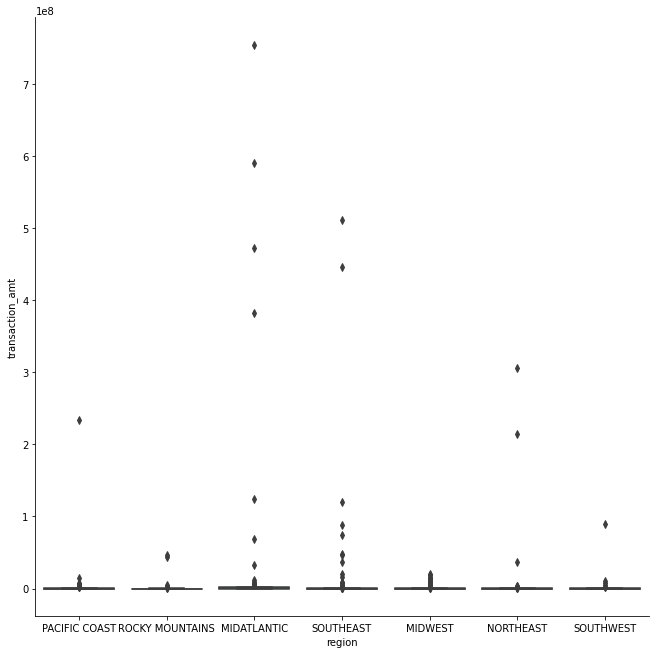

In [13]:
sns.catplot(x="region", y="transaction_amt", kind="box", data=df, height = 9, aspect = 1)

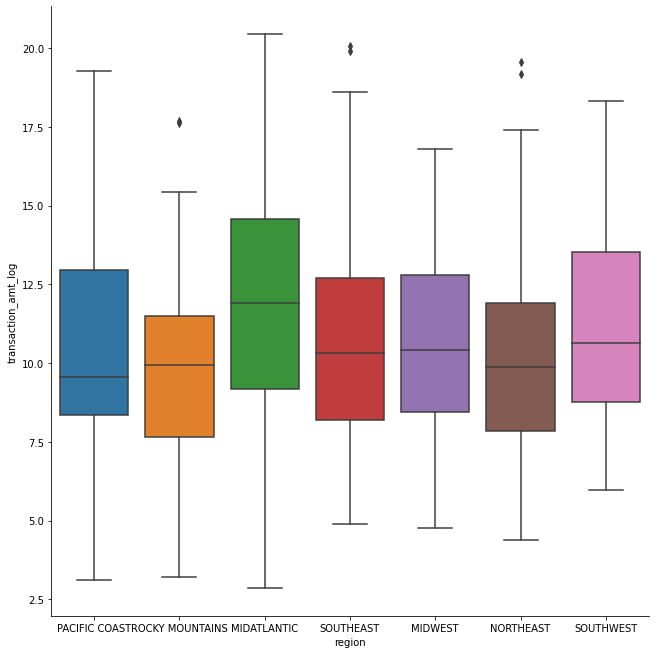

In [14]:
sns.catplot(x="region", y="transaction_amt_log", kind="box", data=df, height = 9, aspect = 1)

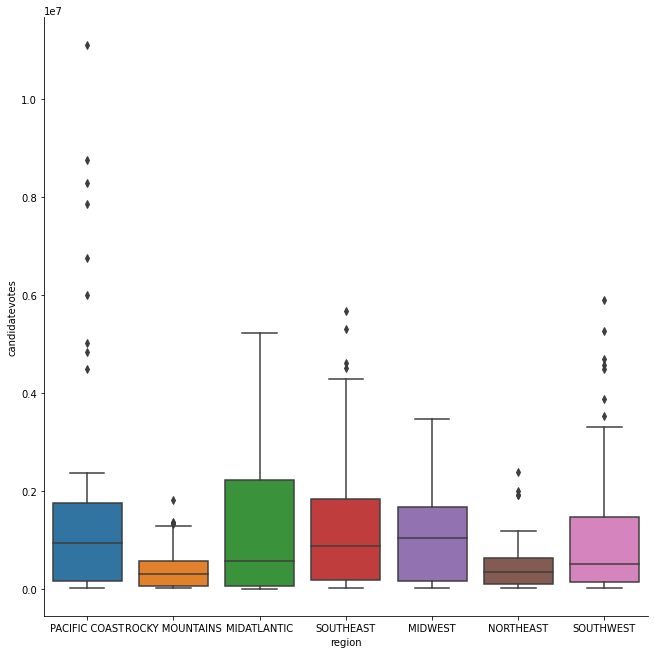

In [15]:
sns.catplot(x="region", y="candidatevotes", kind="box", data=df, height = 9, aspect = 1)

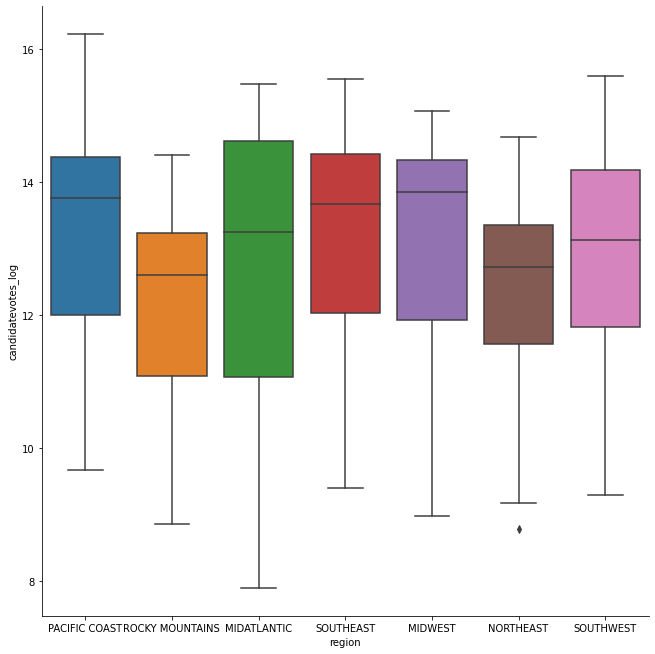

In [16]:
sns.catplot(x="region", y="candidatevotes_log", kind="box", data=df, height = 9, aspect = 1)

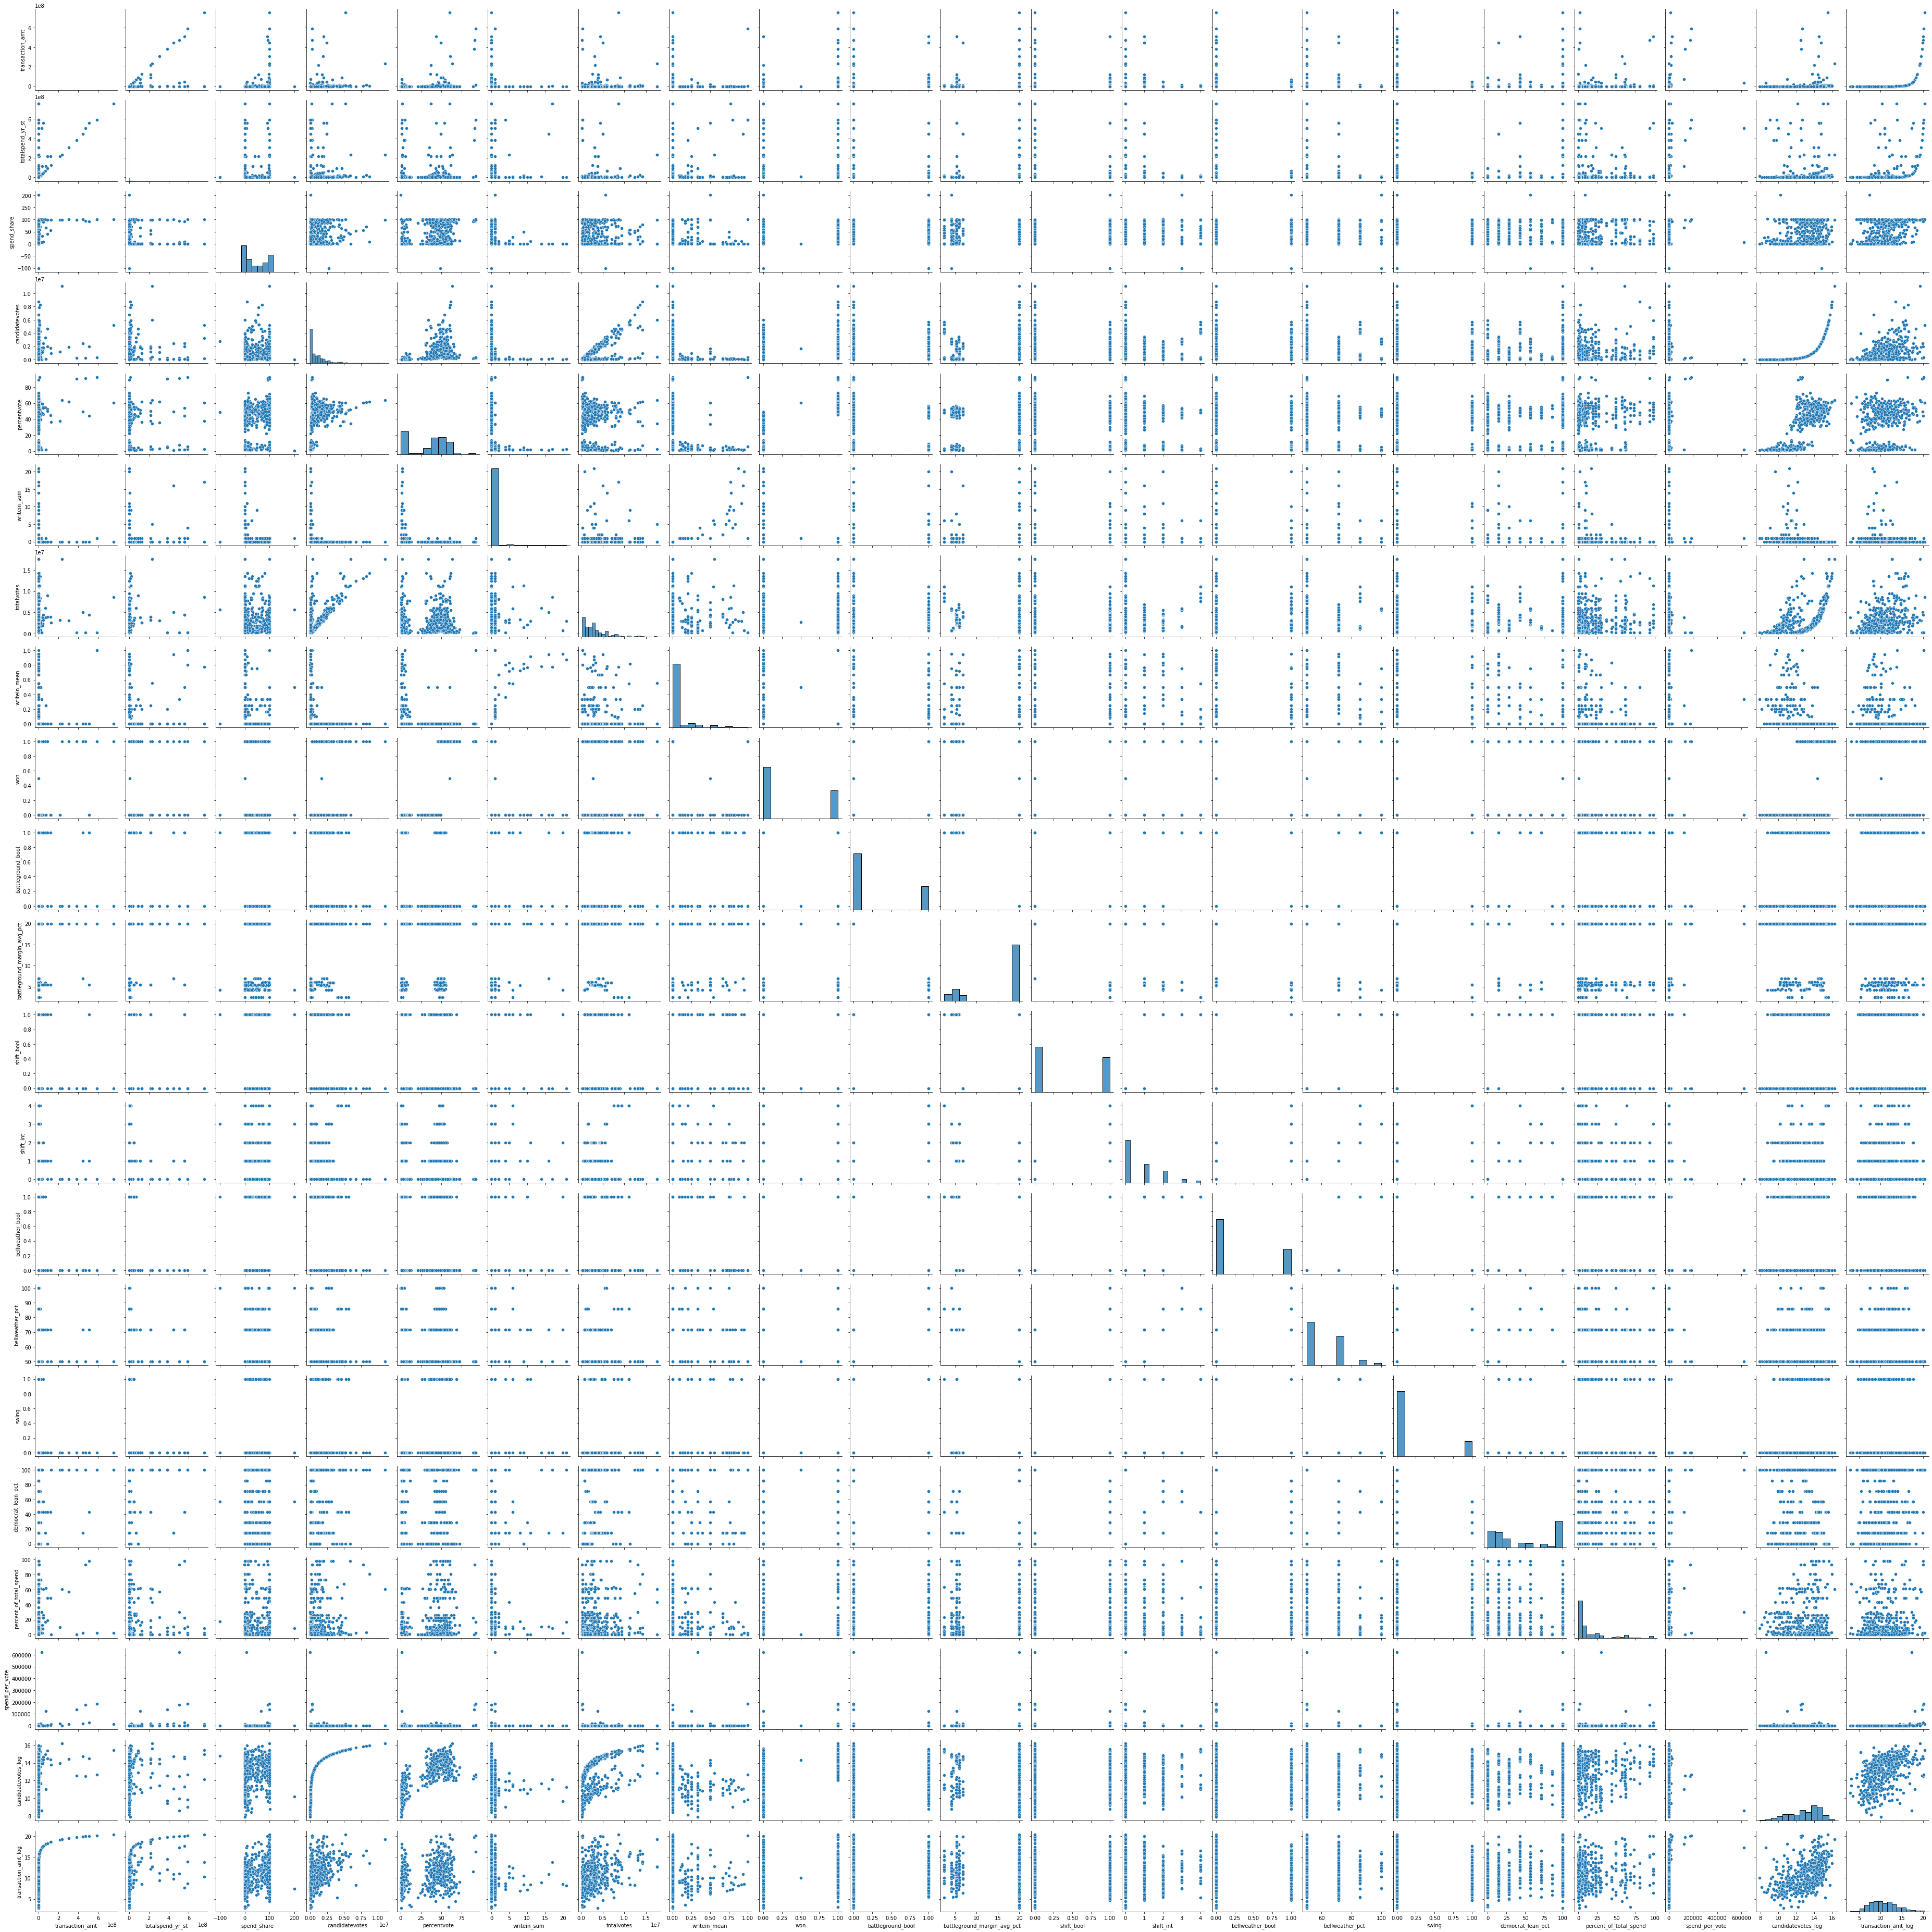

In [17]:
sns.pairplot(df)

In [18]:
sns.pairplot(
    df,
    x_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"],
    y_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"]
)

Error in callback <function flush_figures at 0x11c5a6700> (for post_execute):


KeyboardInterrupt: 

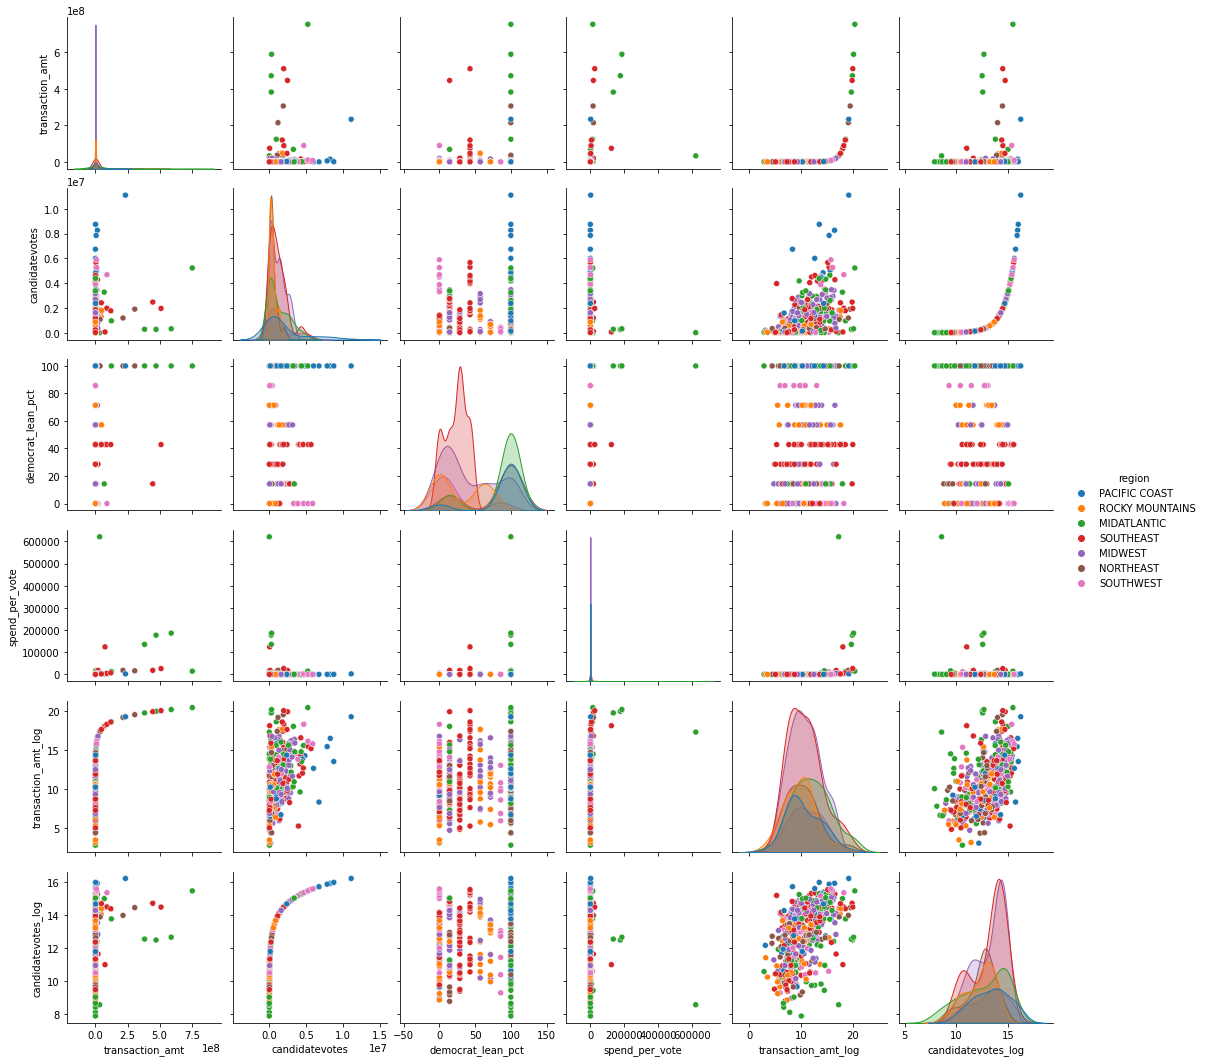

In [19]:
sns.pairplot(
    df, hue = "region", 
    x_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"],
    y_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"]
)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

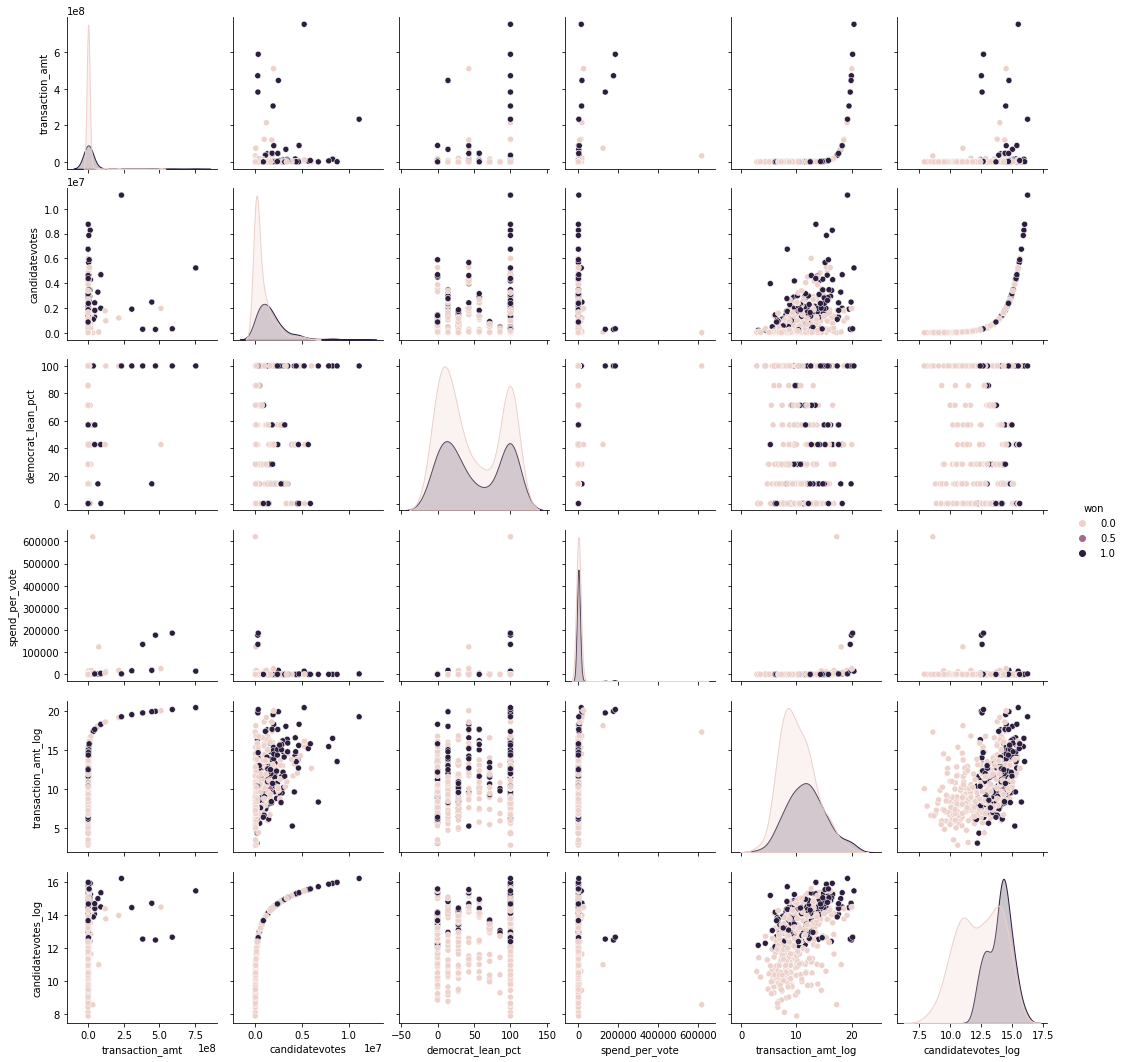

In [20]:
sns.pairplot(
    df, hue = "won", 
    x_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"],
    y_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"]
)

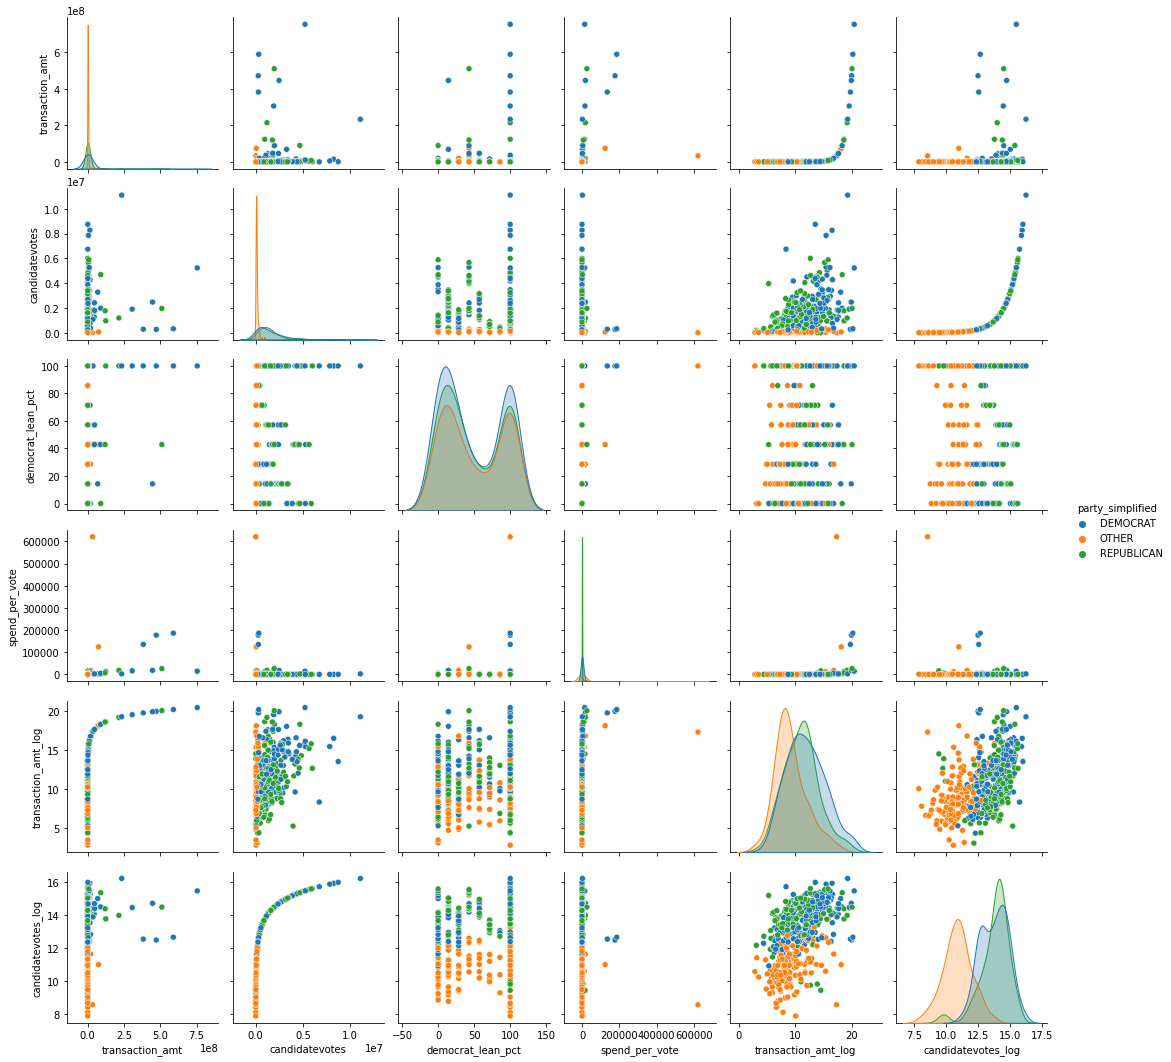

In [21]:
sns.pairplot(
    df, hue = "party_simplified", 
    x_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"],
    y_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"]
)

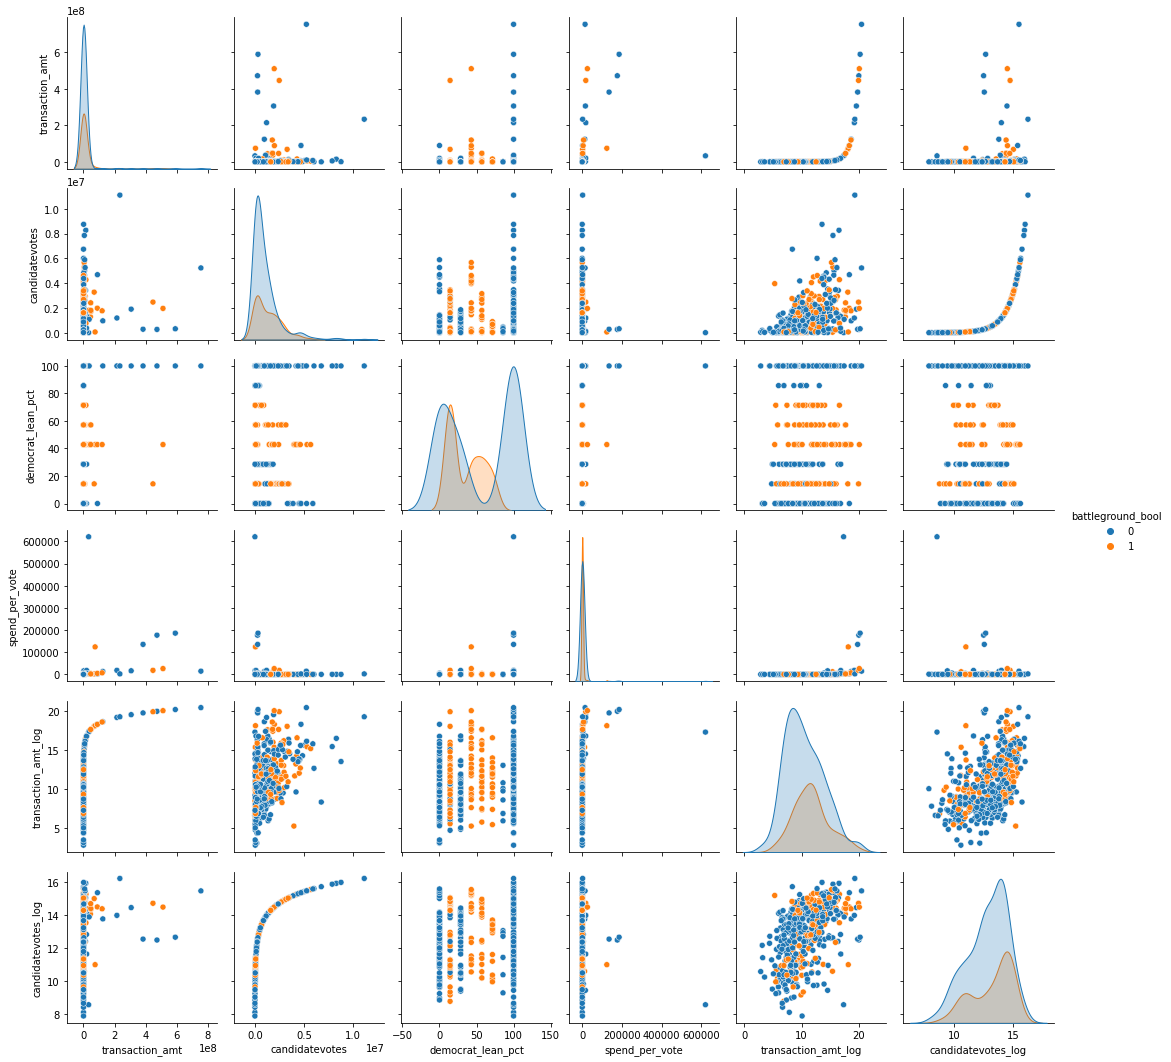

In [22]:
sns.pairplot(
    df, hue = "battleground_bool", 
    x_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"],
    y_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"]
)

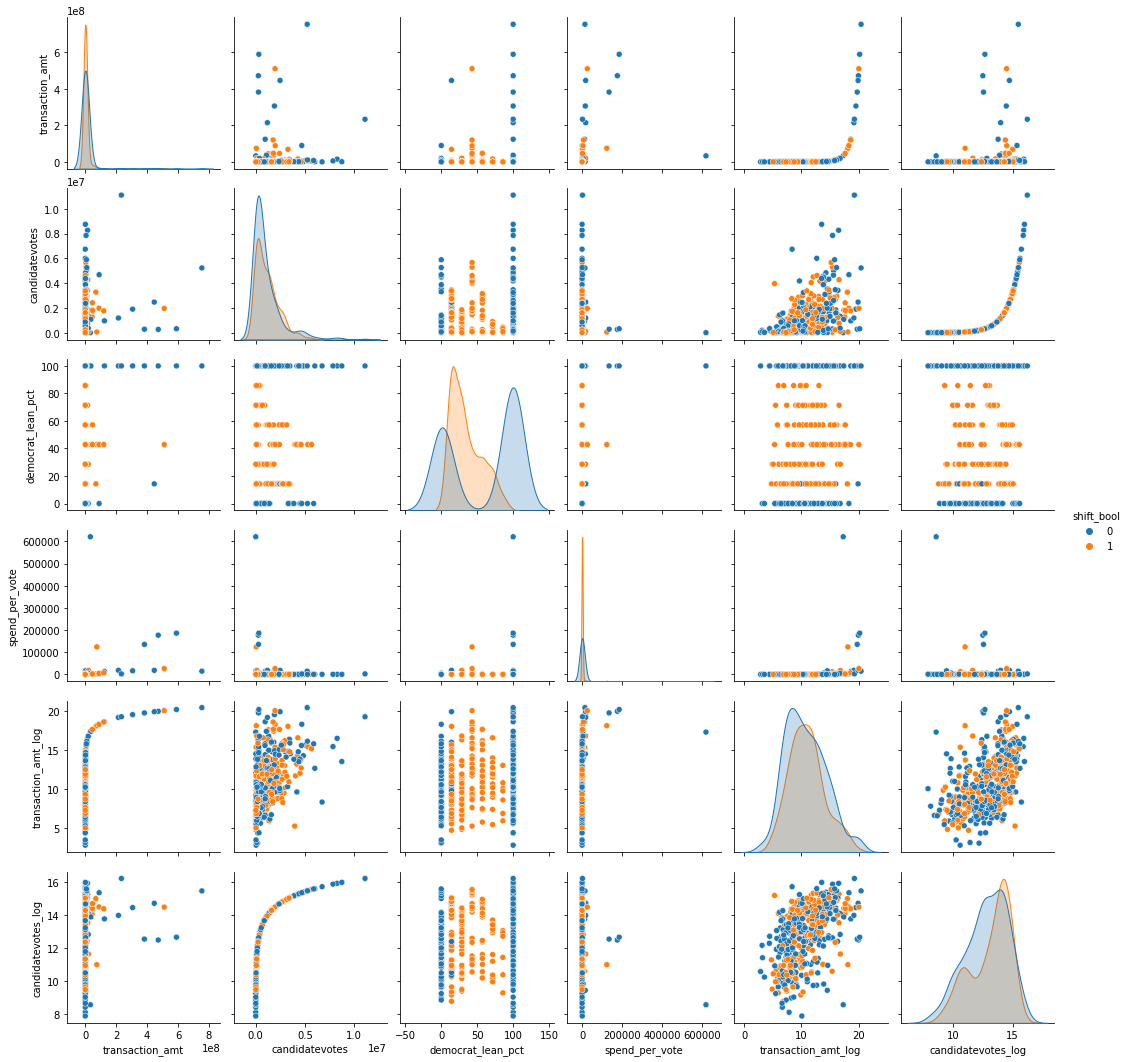

In [23]:
sns.pairplot(
    df, hue = "shift_bool", 
    x_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"],
    y_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"]
)

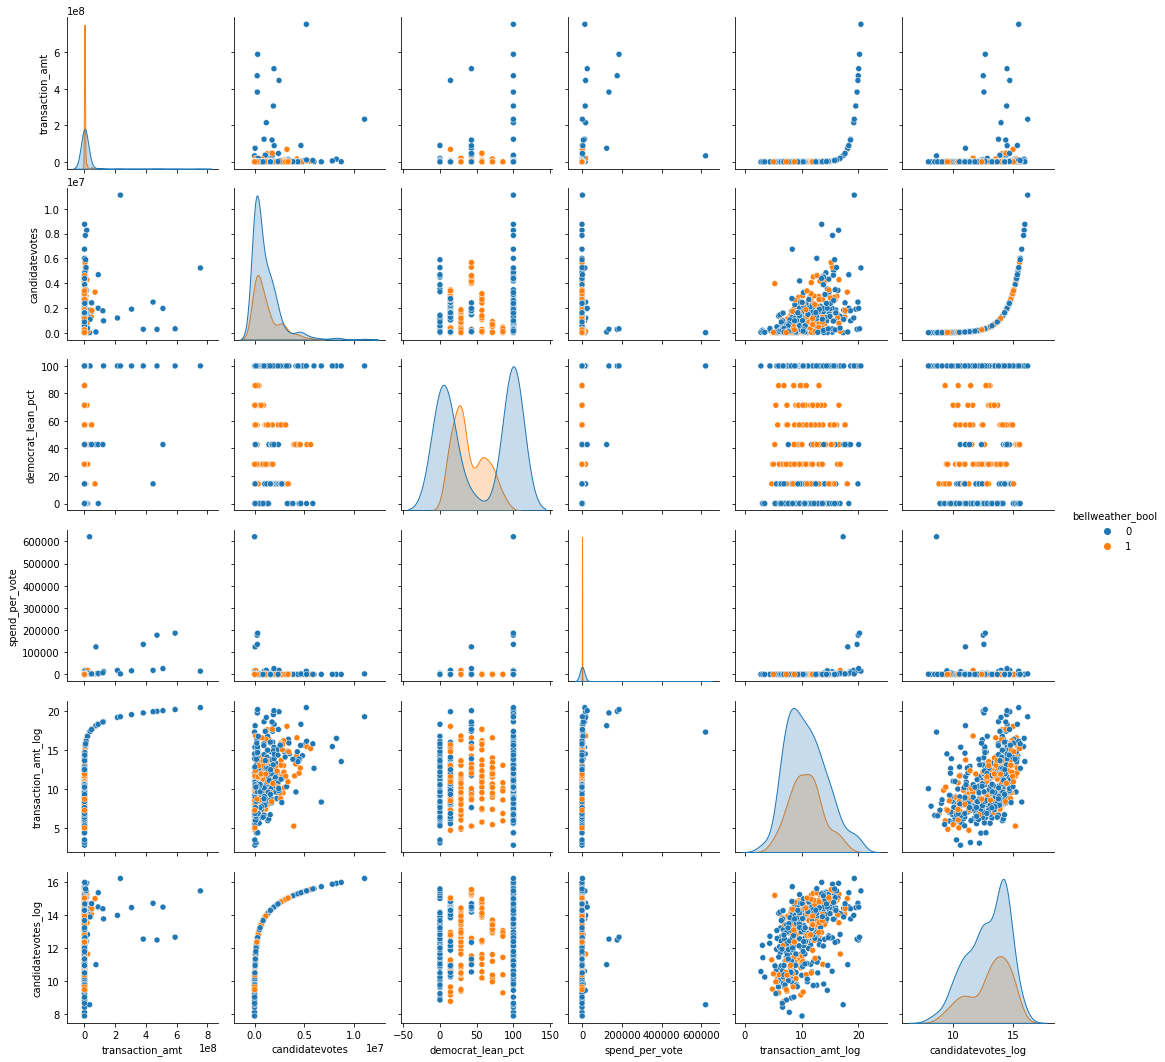

In [24]:
sns.pairplot(
    df, hue = "bellweather_bool", 
    x_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"],
    y_vars=["transaction_amt", 'candidatevotes', 'democrat_lean_pct', 'spend_per_vote', "transaction_amt_log", "candidatevotes_log"]
)

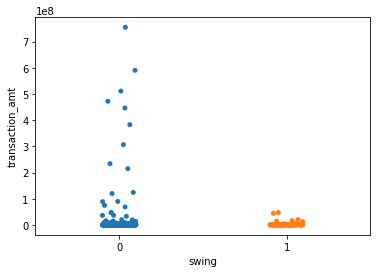

In [46]:
ax = sns.stripplot(x="swing", y="transaction_amt", data=df)
plt.show()

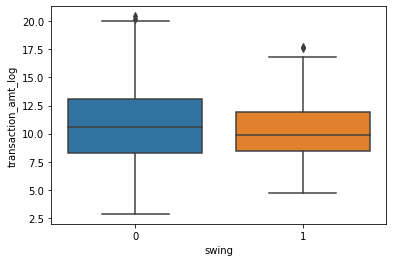

In [47]:
ax = sns.boxplot(x="swing", y="transaction_amt_log", data=df)
plt.show()

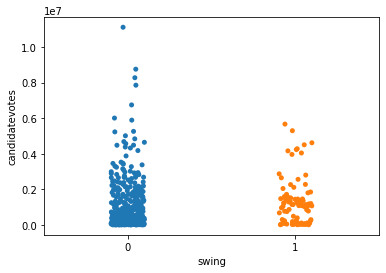

In [48]:
ax = sns.stripplot(x="swing", y="candidatevotes", data=df)
plt.show()

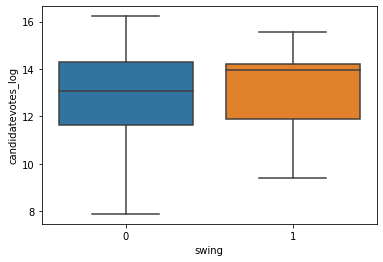

In [49]:
ax = sns.boxplot(x="swing", y="candidatevotes_log", data=df)
plt.show()

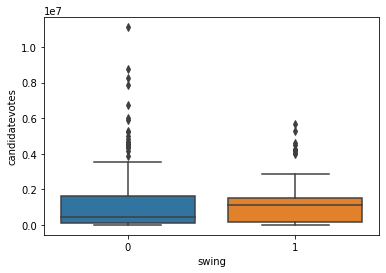

In [50]:
ax = sns.boxplot(x="swing", y="candidatevotes", data=df)
plt.show()

In [51]:
votes_0=df[df.swing== 0].candidatevotes
votes_1=df[df.swing== 1].candidatevotes

statistic, pvalue = stats.ttest_ind(votes_0,votes_1, equal_var=False)
statistic, pvalue

(-1.3562755797839459, 0.17711103785520932)

In [52]:
votes_0=df[df.swing== 0].candidatevotes_log
votes_1=df[df.swing== 1].candidatevotes_log

statistic, pvalue = stats.ttest_ind(votes_0,votes_1, equal_var=False)
statistic, pvalue

(-1.9356931243762765, 0.05492566541135607)

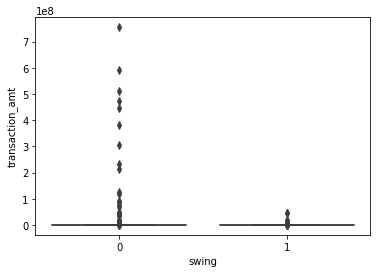

In [53]:
ax = sns.boxplot(x="swing", y="transaction_amt", data=df)
plt.show()

In [54]:
spend_0=df[df.swing== 0].transaction_amt
spend_1=df[df.swing== 1].transaction_amt

statistic, pvalue = stats.ttest_ind(spend_0,spend_1, equal_var=False)
statistic, pvalue

(2.953842993427075, 0.0033071276985007464)

In [55]:
spend_0=df[df.swing== 0].transaction_amt_log
spend_1=df[df.swing== 1].transaction_amt_log

statistic, pvalue = stats.ttest_ind(spend_0,spend_1, equal_var=False)
statistic, pvalue

(nan, nan)

In [56]:
#candidate votes of swing states in significantly different
swing_yes=df[df.swing==1].candidatevotes_log
swing_no=df[df.swing==0].candidatevotes_log

statistic, pvalue = stats.ttest_ind(swing_yes,swing_no, equal_var=False)
statistic, pvalue

(1.9356931243762765, 0.05492566541135607)

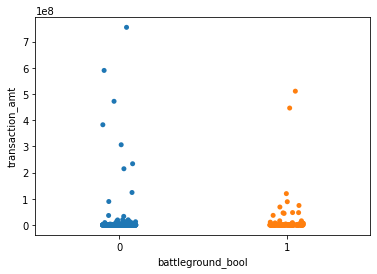

In [57]:
ax = sns.stripplot(x="battleground_bool", y="transaction_amt", data=df)
plt.show()

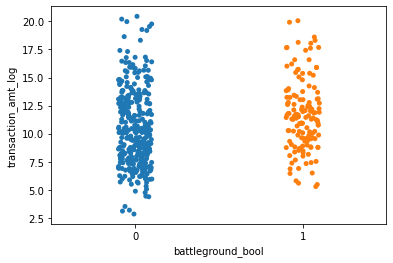

In [58]:
ax = sns.stripplot(x="battleground_bool", y="transaction_amt_log", data=df)
plt.show()

In [59]:
df.columns

Index(['election_year', 'state_x', 'transaction_amt', 'totalspend_yr_st',
       'spend_share', 'party_simplified', 'candidatevotes', 'percentvote',
       'writein_sum', 'totalvotes', 'writein_mean', 'won', 'region',
       'battleground_bool', 'battleground_margin_avg_pct', 'shift_bool',
       'shift_int', 'bellweather_bool', 'bellweather_pct', 'swing',
       'democrat_lean_pct', 'percent_of_total_spend', 'spend_per_vote',
       'candidatevotes_log', 'transaction_amt_log'],
      dtype='object')

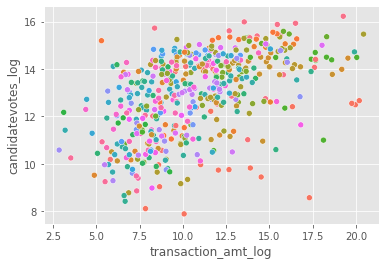

In [80]:
sns.scatterplot(data=df, x="transaction_amt_log", y="candidatevotes_log", hue = "state_x")
plt.legend([],[], frameon=False)

<AxesSubplot:xlabel='transaction_amt_log', ylabel='candidatevotes_log'>

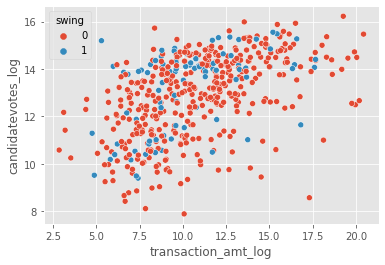

In [82]:
sns.scatterplot(data=df, y="candidatevotes_log", x="transaction_amt_log", hue = "swing")

<AxesSubplot:xlabel='candidatevotes_log', ylabel='transaction_amt_log'>

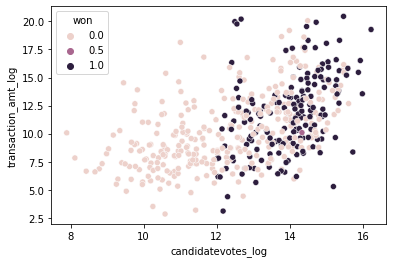

In [61]:
sns.scatterplot(data=df, x="candidatevotes_log", y="transaction_amt_log", hue = "won")

<AxesSubplot:xlabel='transaction_amt_log', ylabel='candidatevotes_log'>

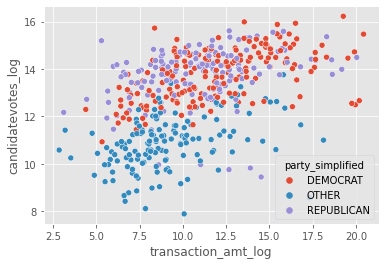

In [83]:
sns.scatterplot(data=df, y="candidatevotes_log", x="transaction_amt_log", hue = "party_simplified")

<AxesSubplot:xlabel='transaction_amt_log', ylabel='candidatevotes_log'>

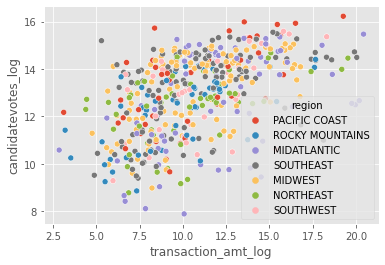

In [81]:
sns.scatterplot(data=df, x="transaction_amt_log", y="candidatevotes_log", hue = "region")

<AxesSubplot:xlabel='candidatevotes', ylabel='transaction_amt'>

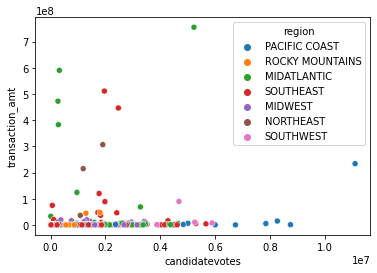

In [64]:
sns.scatterplot(data=df, x="candidatevotes", y="transaction_amt", hue = "region")

In [65]:
df.groupby("region").median()

transaction_amt  totalspend_yr_st  spend_share  \
region                                                            
MIDATLANTIC           148134.940        6137677.25    11.928319   
MIDWEST                33143.410         371001.13    28.020687   
NORTHEAST              17653.165         201349.38    46.010209   
PACIFIC COAST          14762.300         104541.50    40.542680   
ROCKY MOUNTAINS        20992.250         199668.53    30.970873   
SOUTHEAST              29708.720         512115.00    31.432886   
SOUTHWEST              35078.300         539495.72    19.142719   

                 candidatevotes  percentvote  writein_sum  totalvotes  \
region                                                                  
MIDATLANTIC            569159.0    36.947034          0.0   3638499.0   
MIDWEST               1033126.0    44.710916          0.0   2936561.0   
NORTHEAST              332755.5    44.036328          0.0    806182.0   
PACIFIC COAST          943580.0    38.328176          0.0   3125516.0   
ROCKY MOUNTAINS        296226.5    39.097709          0.0   1017440.0   
SOUTHEAST              862449.0    44.088033          0.0   2508027.0   
SOUTHWEST              503890.0    43.235258          0.0   2299254.0   

                 writein_mean  won  battleground_bool  ...  shift_bool  \
region                                                 ...               
MIDATLANTIC               0.0  0.0                0.0  ...         0.0   
MIDWEST                   0.0  0.0                0.0  ...         1.0   
NORTHEAST                 0.0  0.0                0.0  ...         0.0   
PACIFIC COAST             0.0  0.0                0.0  ...         0.0   
ROCKY MOUNTAINS           0.0  0.0                0.0  ...         0.0   
SOUTHEAST                 0.0  0.0                0.0  ...         1.0   
SOUTHWEST                 0.0  0.0                0.0  ...         0.0   

                 shift_int  bellweather_bool  bellweather_pct  swing  \
region                                                                 
MIDATLANTIC            0.0               0.0            50.00    0.0   
MIDWEST                1.0               0.0            71.43    0.0   
NORTHEAST              0.0               0.0            50.00    0.0   
PACIFIC COAST          0.0               0.0            50.00    0.0   
ROCKY MOUNTAINS        0.5               0.0            50.00    0.0   
SOUTHEAST              1.0               0.0            71.43    0.0   
SOUTHWEST              0.0               0.0            50.00    0.0   

                 democrat_lean_pct  percent_of_total_spend  spend_per_vote  \
region                                                                       
MIDATLANTIC                100.000                   8.640       25.437053   
MIDWEST                     28.570                   3.080        7.462850   
NORTHEAST                  100.000                   2.980       13.985914   
PACIFIC COAST              100.000                  11.265        5.469905   
ROCKY MOUNTAINS              7.145                   8.250        7.855664   
SOUTHEAST                   28.570                   8.800        5.583976   
SOUTHWEST                    0.000                  11.000       18.681930   

                 candidatevotes_log  transaction_amt_log  
region                                                    
MIDATLANTIC               13.251915            11.905879  
MIDWEST                   13.848100            10.416323  
NORTHEAST                 12.715127             9.876493  
PACIFIC COAST             13.757436             9.552997  
ROCKY MOUNTAINS           12.598397             9.922469  
SOUTHEAST                 13.667531            10.309511  
SOUTHWEST                 13.130113            10.647938  

[7 rows x 21 columns]

In [66]:
#midwest and southeast have low democrat lean pct median. But they have the most wins
df.groupby("region")[['transaction_amt', 'candidatevotes', 'percentvote', 
                      'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].median()

transaction_amt  candidatevotes  percentvote  spend_per_vote  \
region                                                                          
MIDATLANTIC           148134.940        569159.0    36.947034       25.437053   
MIDWEST                33143.410       1033126.0    44.710916        7.462850   
NORTHEAST              17653.165        332755.5    44.036328       13.985914   
PACIFIC COAST          14762.300        943580.0    38.328176        5.469905   
ROCKY MOUNTAINS        20992.250        296226.5    39.097709        7.855664   
SOUTHEAST              29708.720        862449.0    44.088033        5.583976   
SOUTHWEST              35078.300        503890.0    43.235258       18.681930   

                 percent_of_total_spend  democrat_lean_pct  
region                                                      
MIDATLANTIC                       8.640            100.000  
MIDWEST                           3.080             28.570  
NORTHEAST                         2.980            100.000  
PACIFIC COAST                    11.265            100.000  
ROCKY MOUNTAINS                   8.250              7.145  
SOUTHEAST                         8.800             28.570  
SOUTHWEST                        11.000              0.000

In [67]:
df.groupby("region")[['transaction_amt', 'candidatevotes', 'percentvote', 
                      'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].mean()

transaction_amt  candidatevotes  percentvote  spend_per_vote  \
region                                                                          
MIDATLANTIC         3.523196e+07    1.264037e+06    33.680773    16723.734748   
MIDWEST             1.447490e+06    1.133665e+06    36.273618      154.143658   
NORTHEAST           1.019719e+07    4.927422e+05    37.949481      726.409685   
PACIFIC COAST       6.306365e+06    1.965790e+06    34.017023      105.579837   
ROCKY MOUNTAINS     1.907843e+06    4.330545e+05    33.364778      190.247890   
SOUTHEAST           1.221465e+07    1.195466e+06    35.675900     1769.691650   
SOUTHWEST           3.179306e+06    1.357813e+06    33.649778      413.742923   

                 percent_of_total_spend  democrat_lean_pct  
region                                                      
MIDATLANTIC                   14.562817          85.513803  
MIDWEST                       10.041504          41.593717  
NORTHEAST                     13.016607          78.572500  
PACIFIC COAST                 26.944091          88.636364  
ROCKY MOUNTAINS               18.850926          29.100370  
SOUTHEAST                     19.421513          23.050168  
SOUTHWEST                     23.717179          19.780769

In [68]:
df.groupby("region")[['won']].sum()

won
region               
MIDATLANTIC      23.5
MIDWEST          40.0
NORTHEAST        24.0
PACIFIC COAST    16.0
ROCKY MOUNTAINS  17.0
SOUTHEAST        42.0
SOUTHWEST        13.0

In [97]:
dem_swing = df_dem.groupby("region")[['battleground_bool', 'shift_bool', 'bellweather_bool', 'swing','won', 'transaction_amt', 'candidatevotes']].sum().reset_index()
dem_swing

region  battleground_bool  shift_bool  bellweather_bool  swing  \
0      MIDATLANTIC                  4           4                 4      0   
1          MIDWEST                 13          24                17     11   
2        NORTHEAST                  5           5                 5      0   
3    PACIFIC COAST                  0           0                 0      0   
4  ROCKY MOUNTAINS                  8           8                 8      4   
5        SOUTHEAST                 17          29                20     17   
6        SOUTHWEST                  4           6                 2      0   

    won  transaction_amt  candidatevotes  
0  22.5     2.305893e+09        53345277  
1  20.0     1.146420e+08        67686389  
2  24.0     3.546215e+08        16700015  
3  15.0     2.575775e+08        55765625  
4   8.0     9.558128e+07        10864735  
5   8.0     6.266098e+08        63688954  
6   3.0     1.674347e+07        23204732

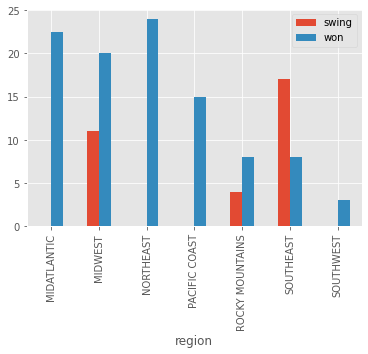

In [124]:
_ = dem_swing.plot(kind= 'bar', x = 'region', y= ['swing', 'won'])
plt.show()

In [36]:
df_rep.groupby("region")[['battleground_bool', 'shift_bool', 'bellweather_bool', 'swing','won', 'transaction_amt', 'candidatevotes']].sum()

battleground_bool  shift_bool  bellweather_bool  swing   won  \
region                                                                          
MIDATLANTIC                      4           4                 4      0   1.0   
MIDWEST                         12          24                17     12  20.0   
NORTHEAST                        4           4                 4      0   0.0   
PACIFIC COAST                    0           0                 0      0   1.0   
ROCKY MOUNTAINS                  8           8                 8      4   9.0   
SOUTHEAST                       18          30                21     18  34.0   
SOUTHWEST                        4           6                 2      0  10.0   

                 transaction_amt  candidatevotes  
region                                            
MIDATLANTIC         1.582897e+08        33136235  
MIDWEST             4.341919e+07        57809757  
NORTHEAST           2.159764e+08        10037357  
PACIFIC COAST       9.297695e+06        27574726  
ROCKY MOUNTAINS     1.321400e+06        11303352  
SOUTHEAST           7.238573e+08        76347787  
SOUTHWEST           1.013466e+08        28485663

In [126]:
rep_swing = df_rep.groupby("region")[['battleground_bool', 'shift_bool', 'bellweather_bool', 'swing','won', 'transaction_amt', 'candidatevotes']].sum().reset_index()
rep_swing

region  battleground_bool  shift_bool  bellweather_bool  swing  \
0      MIDATLANTIC                  4           4                 4      0   
1          MIDWEST                 12          24                17     12   
2        NORTHEAST                  4           4                 4      0   
3    PACIFIC COAST                  0           0                 0      0   
4  ROCKY MOUNTAINS                  8           8                 8      4   
5        SOUTHEAST                 18          30                21     18   
6        SOUTHWEST                  4           6                 2      0   

    won  transaction_amt  candidatevotes  
0   1.0     1.582897e+08        33136235  
1  20.0     4.341919e+07        57809757  
2   0.0     2.159764e+08        10037357  
3   1.0     9.297695e+06        27574726  
4   9.0     1.321400e+06        11303352  
5  34.0     7.238573e+08        76347787  
6  10.0     1.013466e+08        28485663

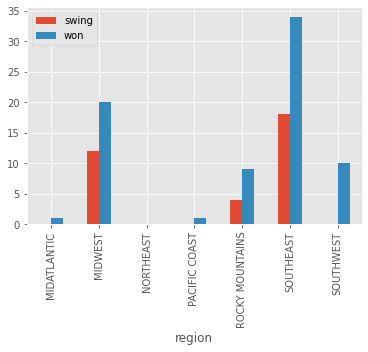

In [127]:
_ = rep_swing.plot(kind= 'bar', x = 'region', y= ['swing', 'won'])
plt.show()

In [72]:
df_dem.groupby("region")[['transaction_amt', 'candidatevotes', 'percentvote', 
                      'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].median()

transaction_amt  candidatevotes  percentvote  spend_per_vote  \
region                                                                          
MIDATLANTIC          1475590.920       2135532.0    60.242755       69.298136   
MIDWEST               100300.000       1374039.0    46.453841       13.177525   
NORTHEAST              46825.600        377193.5    58.377901       15.467099   
PACIFIC COAST          66603.320       1541550.5    56.601062        4.487713   
ROCKY MOUNTAINS        35316.080        327670.0    40.549369        7.451394   
SOUTHEAST             140393.375        868318.0    42.209144       14.328231   
SOUTHWEST              32948.830       1034707.0    44.589767        6.538893   

                 percent_of_total_spend  democrat_lean_pct  
region                                                      
MIDATLANTIC                       2.180             100.00  
MIDWEST                           2.180              14.29  
NORTHEAST                         7.635             100.00  
PACIFIC COAST                     2.870             100.00  
ROCKY MOUNTAINS                   8.250              14.29  
SOUTHEAST                         6.000              28.57  
SOUTHWEST                         0.680               0.00

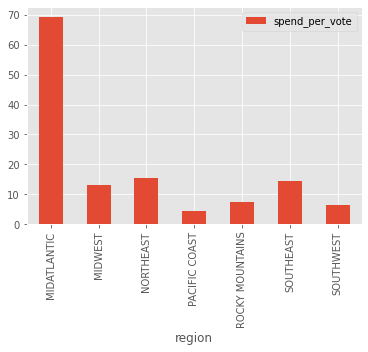

In [128]:
dem_med = df_dem.groupby("region")[['transaction_amt', 'candidatevotes', 'percentvote', 
                      'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].median().reset_index()
_ = dem_med.plot(kind= 'bar', x = 'region', y= 'spend_per_vote')
plt.show()

In [77]:
df_dem.groupby("group")[['transaction_amt', 'candidatevotes', 'percentvote', 
                      'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].median()

transaction_amt  candidatevotes  percentvote  spend_per_vote  \
group                                                                   
GROUP_D       169315.935       1019698.5    58.156328       19.980047   
GROUP_M        44160.295       1052097.0    46.449438       10.079813   
GROUP_R       128549.090        960709.0    43.235258        9.812336   

         percent_of_total_spend  democrat_lean_pct  
group                                               
GROUP_D                    2.87             100.00  
GROUP_M                    3.08              14.29  
GROUP_R                    6.00              14.29

In [78]:
df_rep.groupby("region")[['transaction_amt', 'candidatevotes', 'percentvote', 
                      'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].median()

transaction_amt  candidatevotes  percentvote  spend_per_vote  \
region                                                                          
MIDATLANTIC           170345.540       1227251.0    36.710777       25.962165   
MIDWEST                33659.350       1445814.0    48.822437        3.608099   
NORTHEAST              53861.695        363195.5    40.355705        6.026447   
PACIFIC COAST          10000.000       1290670.0    38.766978        1.325952   
ROCKY MOUNTAINS        54648.000        554119.0    47.666247        6.639163   
SOUTHEAST              63618.815       1470754.0    55.016407        4.352458   
SOUTHWEST             471178.440       1233654.0    53.635248       18.681930   

                 percent_of_total_spend  democrat_lean_pct  
region                                                      
MIDATLANTIC                       2.275             100.00  
MIDWEST                           1.670              28.57  
NORTHEAST                         0.320             100.00  
PACIFIC COAST                     9.150             100.00  
ROCKY MOUNTAINS                   4.480               0.00  
SOUTHEAST                         9.710              28.57  
SOUTHWEST                        13.100               0.00

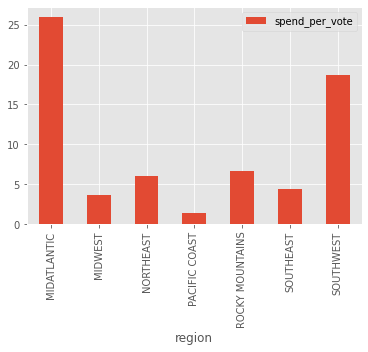

In [129]:
rep_med = df_rep.groupby("region")[['transaction_amt', 'candidatevotes', 'percentvote', 
                      'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].median().reset_index()
_ = rep_med.plot(kind= 'bar', x = 'region', y= 'spend_per_vote')
plt.show()

In [79]:
df_rep.groupby("group")[['transaction_amt', 'candidatevotes', 'percentvote', 
                      'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].median()

transaction_amt  candidatevotes  percentvote  spend_per_vote  \
group                                                                   
GROUP_D         94054.43          959862    38.766978        6.582917   
GROUP_M         36150.21         1268901    48.329864        3.858659   
GROUP_R         71690.67         1441170    54.561131        4.622443   

         percent_of_total_spend  democrat_lean_pct  
group                                               
GROUP_D                    1.67             100.00  
GROUP_M                    3.14              28.57  
GROUP_R                    9.71              28.57

In [80]:
df_rep.head()

election_year state_x  transaction_amt  totalspend_yr_st  spend_share  \
0    2004-01-01      DC          5406.90         118567.63     4.560182   
1    2004-01-01      FL           200.00            200.00   100.000000   
2    2004-01-01      MO          3416.66           3416.66   100.000000   
3    2004-01-01      VA         14970.53         262971.49     5.692834   
4    2008-01-01      AK            22.57            547.57     4.121847   

  party_simplified  candidatevotes  percentvote  writein_sum  totalvotes  ...  \
0       REPUBLICAN           21256     9.339766            0      227586  ...   
1       REPUBLICAN         3964522    52.097516            0     7609810  ...   
2       REPUBLICAN         1455713    53.296192            0     2731364  ...   
3       REPUBLICAN         1716959    53.731957            0     3195415  ...   
4       REPUBLICAN          193841    59.424520            0      326197  ...   

   shift_int  bellweather_bool bellweather_pct  swing  democrat_lean_pct  \
0          0                 0           50.00      0             100.00   
1          4                 1           85.71      1              42.86   
2          1                 1           71.43      1              28.57   
3          1                 0           71.43      0              42.86   
4          0                 0           50.00      0               0.00   

   percent_of_total_spend  spend_per_vote  candidatevotes_log  \
0                   22.53       25.437053            9.964394   
1                   63.23        0.005045           15.192896   
2                   14.24        0.234707           14.191006   
3                   63.23        0.871921           14.356065   
4                   67.86        0.011644           12.174794   

   transaction_amt_log    group  
0             8.595431  GROUP_D  
1             5.298317  GROUP_R  
2             8.136419  GROUP_M  
3             9.613839  GROUP_R  
4             3.116622  GROUP_D  

[5 rows x 26 columns]

Text(0.5, 1.0, 'Democrat')

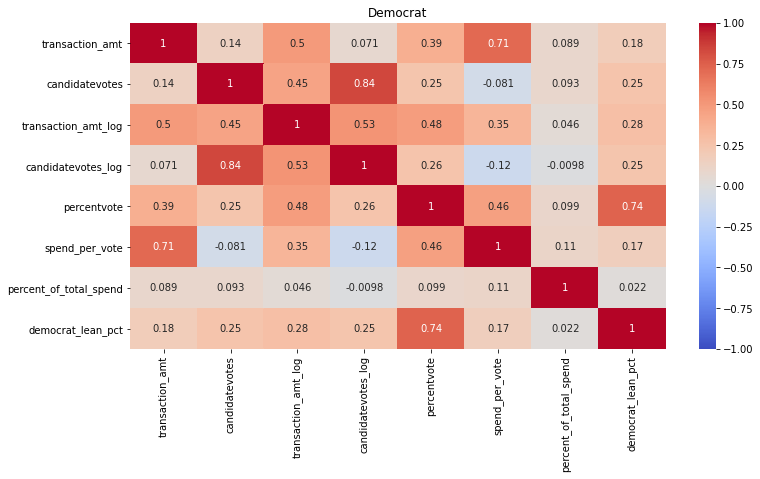

In [81]:
plt.subplots(figsize=(12,6))
corr = df_dem[['transaction_amt', 'candidatevotes', 'transaction_amt_log', 'candidatevotes_log',
               'percentvote', 'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Democrat')

Text(0.5, 1.0, 'Democrat')

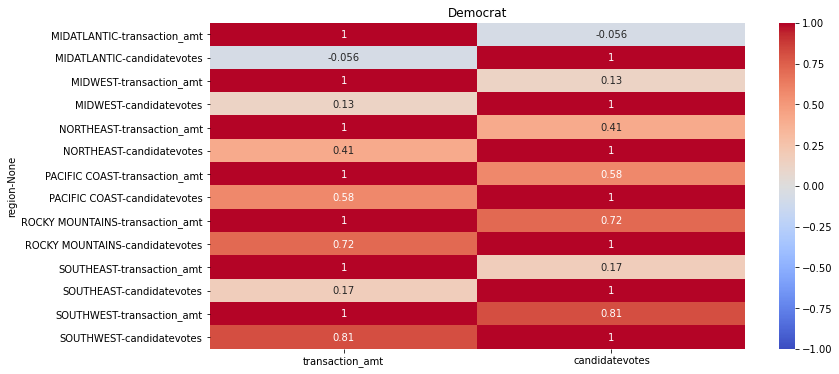

In [82]:
#looking at only states that have strong democratic votes does not make the correlation stronger
plt.subplots(figsize=(12,6))
corr = df_dem.groupby(['region'])[['transaction_amt', 'candidatevotes']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Democrat')

Text(0.5, 1.0, 'Democrat')

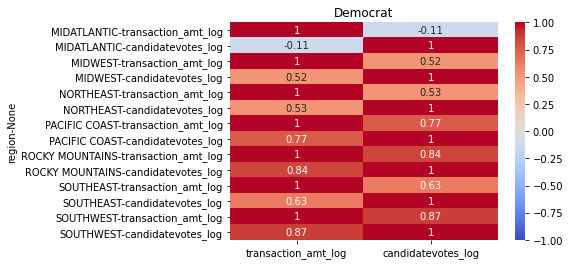

In [83]:
corr = df_dem.groupby(['region'])[['transaction_amt_log', 'candidatevotes_log']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Democrat')

Text(0.5, 1.0, 'Democrat')

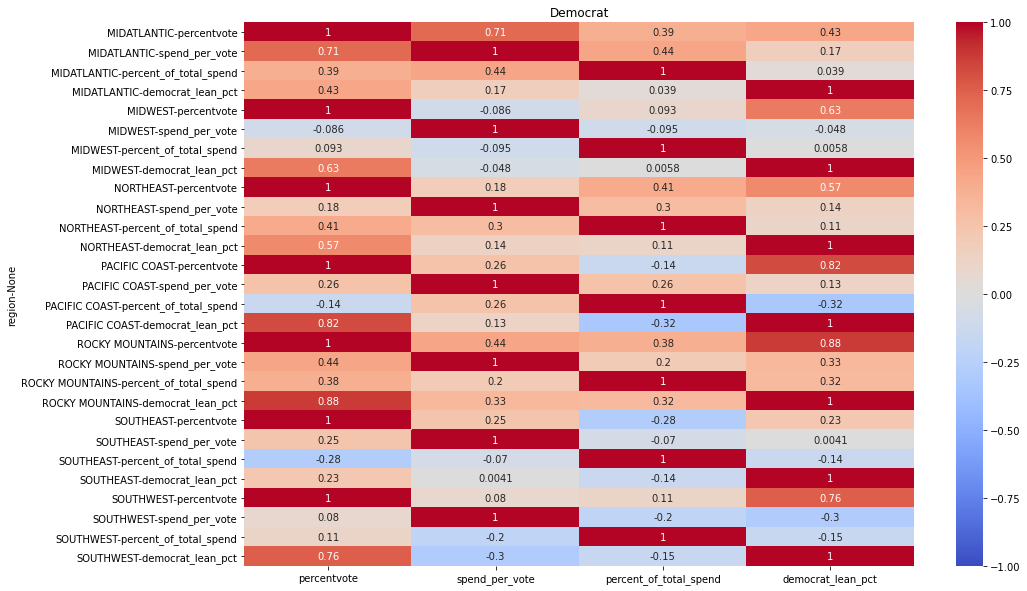

In [84]:
plt.subplots(figsize=(15,10))
corr = df_dem.groupby(['region'])[['percentvote', 'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Democrat')

Text(0.5, 1.0, 'Democrat')

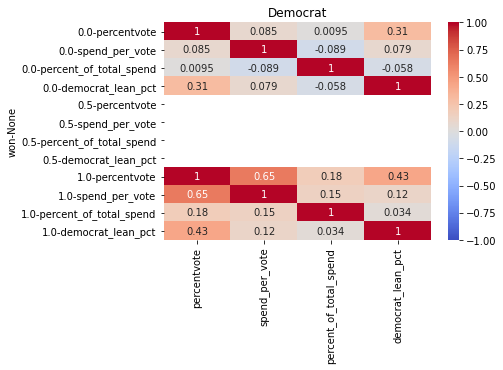

In [85]:
corr = df_dem.groupby(['won'])[['percentvote', 'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Democrat')

Text(0.5, 1.0, 'Democrat')

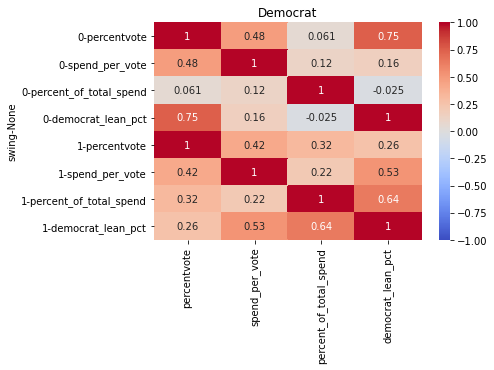

In [86]:
corr = df_dem.groupby(['swing'])[['percentvote', 'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Democrat')

Text(0.5, 1.0, 'Republican')

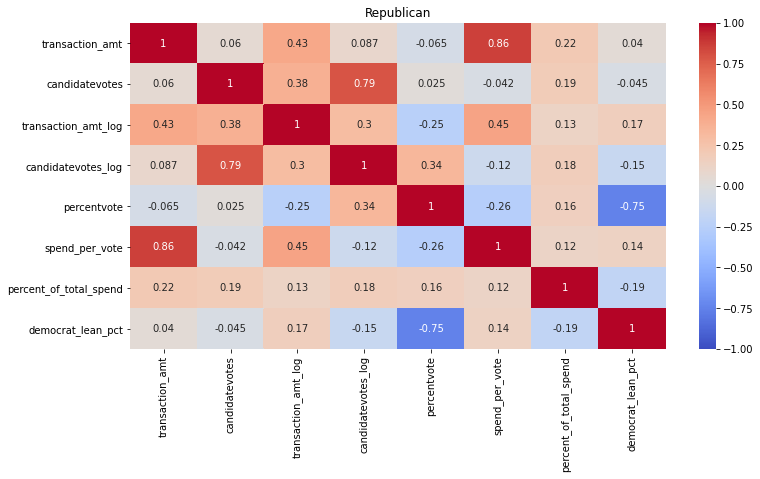

In [87]:
plt.subplots(figsize=(12,6))
corr = df_rep[['transaction_amt', 'candidatevotes', 'transaction_amt_log', 'candidatevotes_log',
               'percentvote', 'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Republican')

Text(0.5, 1.0, 'Republican')

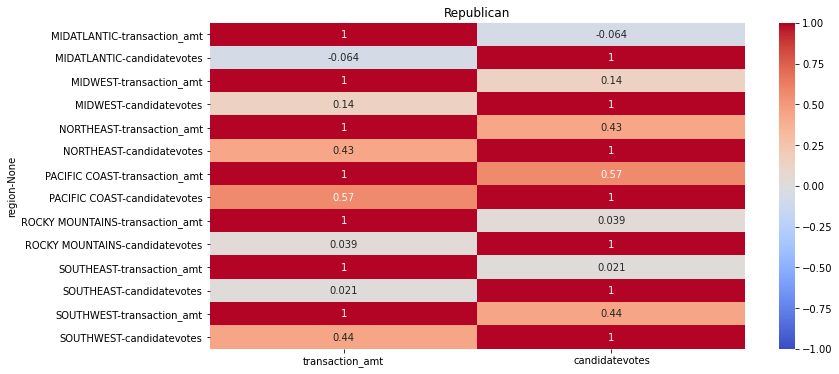

In [88]:
plt.subplots(figsize=(12,6))
corr = df_rep.groupby(['region'])[['transaction_amt', 'candidatevotes']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Republican')

Text(0.5, 1.0, 'Republican')

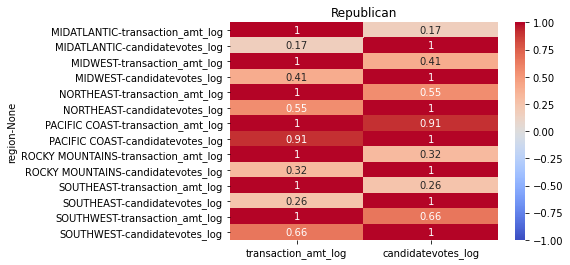

In [89]:
corr = df_rep.groupby(['region'])[['transaction_amt_log', 'candidatevotes_log']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Republican')

Text(0.5, 1.0, 'Republican')

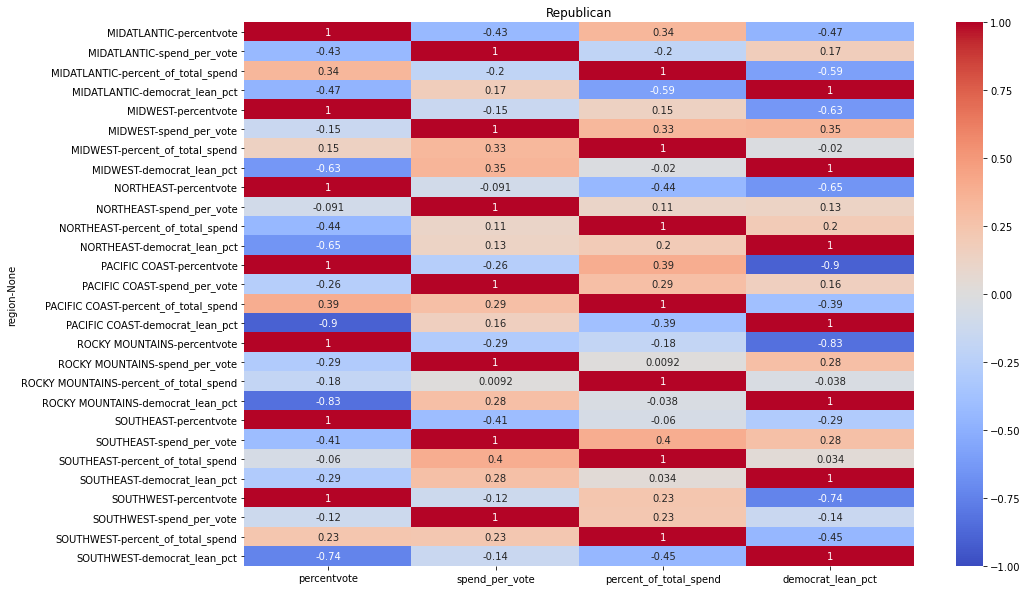

In [90]:
plt.subplots(figsize=(15,10))
corr = df_rep.groupby(['region'])[['percentvote', 'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Republican')

Text(0.5, 1.0, 'Republican')

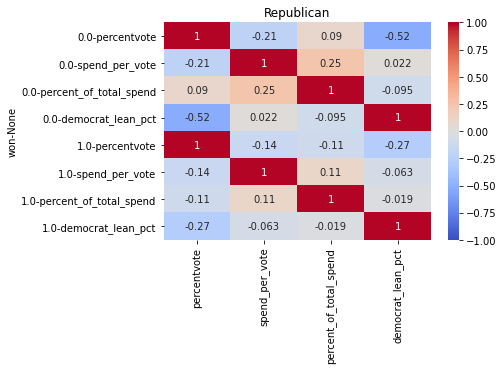

In [91]:
corr = df_rep.groupby(['won'])[['percentvote', 'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Republican')

Text(0.5, 1.0, 'Republican')

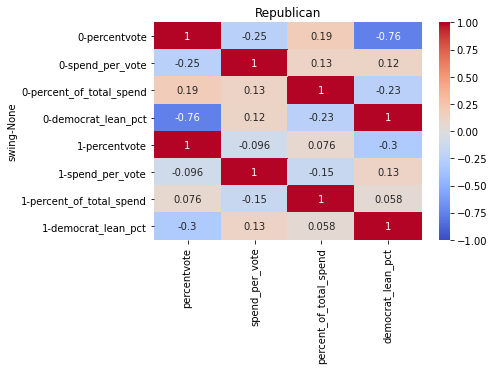

In [92]:
corr = df_rep.groupby(['swing'])[['percentvote', 'spend_per_vote', 'percent_of_total_spend', 'democrat_lean_pct']].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0,cmap = 'coolwarm').set_title('Republican')

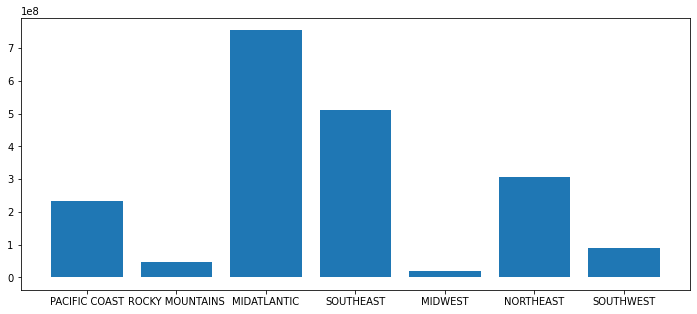

In [93]:
plt.figure(figsize=(12,5))
plt.bar(df['region'],df['transaction_amt'])
plt.show()

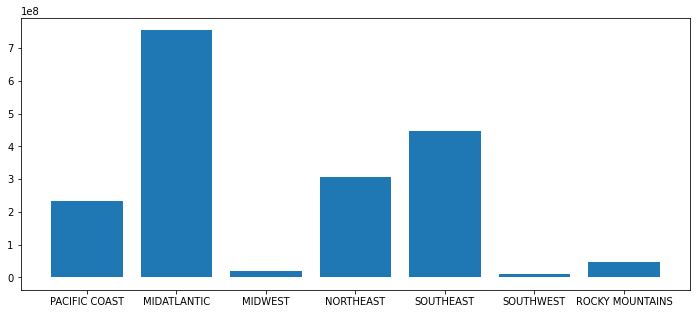

In [94]:
plt.figure(figsize=(12,5))
plt.bar(df_dem['region'],df_dem['transaction_amt'])
plt.show()

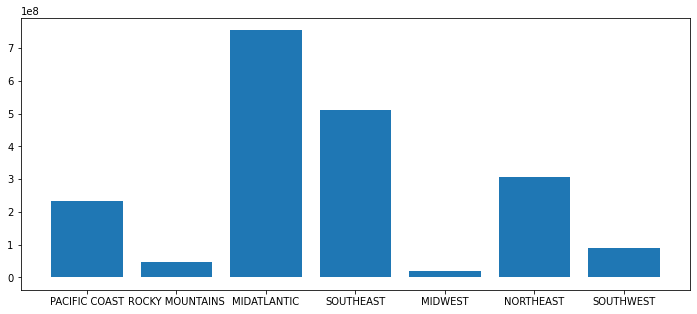

In [96]:
plt.figure(figsize=(12,5))
plt.bar(df['region'],df['transaction_amt'])
plt.show()

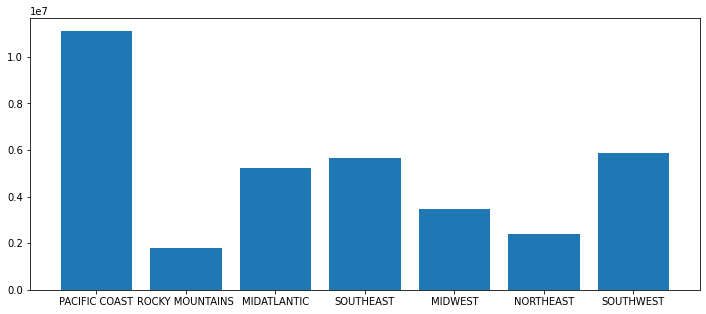

In [97]:
plt.figure(figsize=(12,5))
plt.bar(df['region'],df['candidatevotes'])
plt.show()

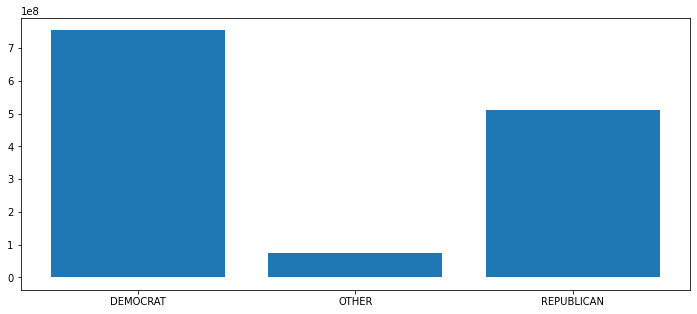

In [98]:
plt.figure(figsize=(12,5))
plt.bar(df['party_simplified'],df['transaction_amt'])
plt.show()

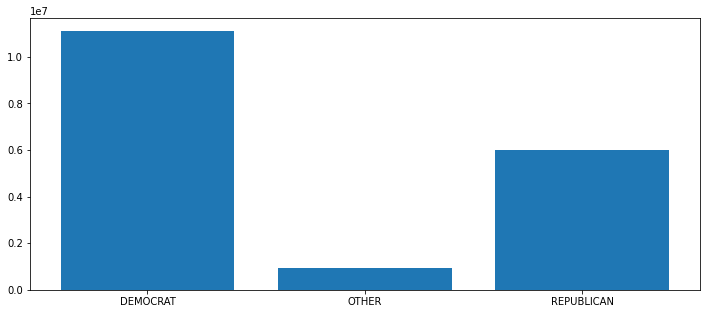

In [99]:
plt.figure(figsize=(12,5))
plt.bar(df['party_simplified'],df['candidatevotes'])
plt.show()

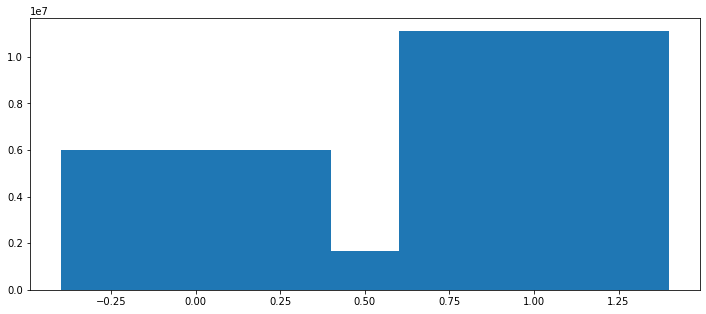

In [100]:
plt.figure(figsize=(12,5))
plt.bar(df['won'],df['candidatevotes'])
plt.show()

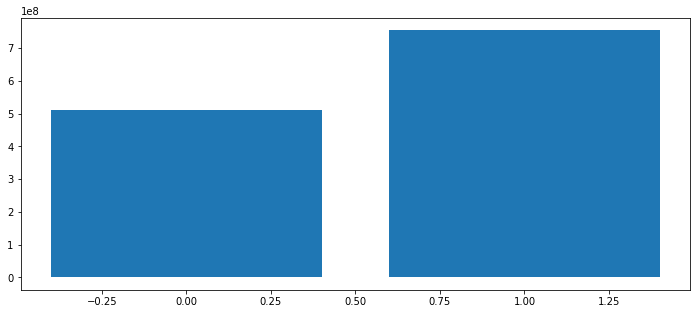

In [101]:
plt.figure(figsize=(12,5))
plt.bar(df['won'],df['transaction_amt'])
plt.show()

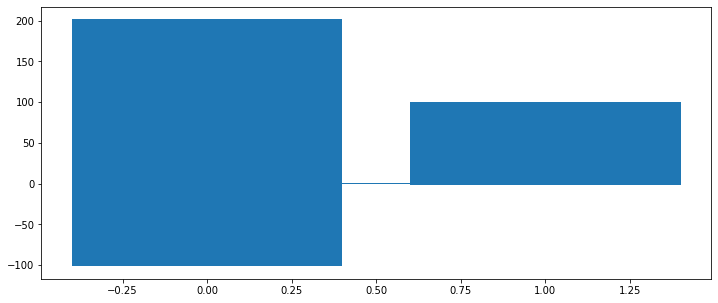

In [102]:
plt.figure(figsize=(12,5))
plt.bar(df['won'],df['spend_share'])
plt.show()

<AxesSubplot:xlabel='transaction_amt', ylabel='candidatevotes'>

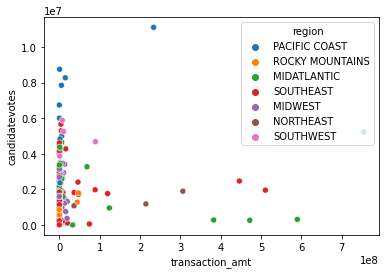

In [103]:
sns.scatterplot(data=df, x="transaction_amt", y="candidatevotes", hue="region")

<AxesSubplot:xlabel='spend_share', ylabel='percentvote'>

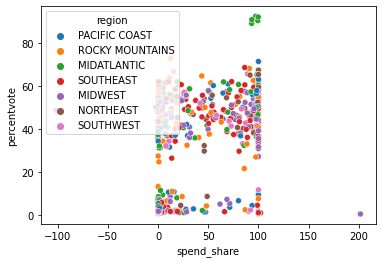

In [104]:
sns.scatterplot(data=df, x="spend_share", y="percentvote", hue="region")

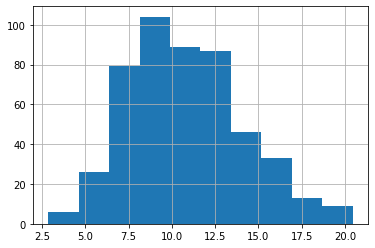

In [105]:
df["transaction_amt"].apply(np.log).hist()
#df["ibu"].apply(np.log).hist()
plt.show()

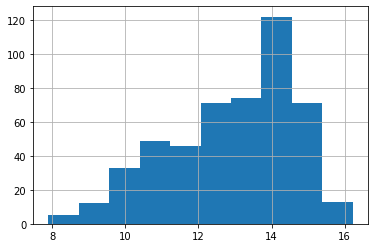

In [106]:
#df["transaction_amt"].apply(np.log).hist()
df["candidatevotes"].apply(np.log).hist()
plt.show()

<AxesSubplot:xlabel='transaction_amt_log', ylabel='candidatevotes_log'>

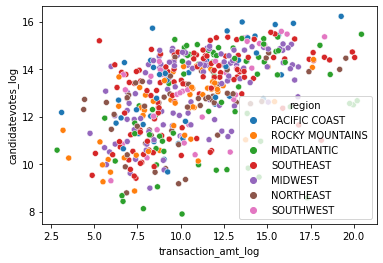

In [107]:
sns.scatterplot(data=df, x="transaction_amt_log", y="candidatevotes_log", hue="region")

<AxesSubplot:xlabel='transaction_amt_log', ylabel='candidatevotes_log'>

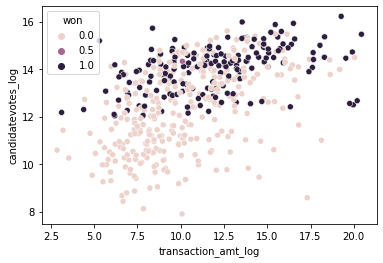

In [108]:
sns.scatterplot(data=df, x="transaction_amt_log", y="candidatevotes_log", hue="won")

<AxesSubplot:xlabel='transaction_amt_log', ylabel='candidatevotes_log'>

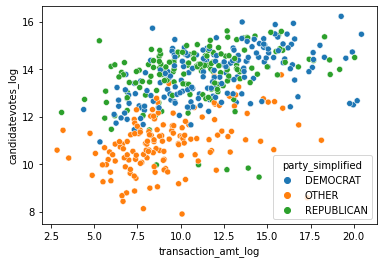

In [109]:
sns.scatterplot(data=df, x="transaction_amt_log", y="candidatevotes_log", hue="party_simplified")

<AxesSubplot:xlabel='transaction_amt_log', ylabel='candidatevotes_log'>

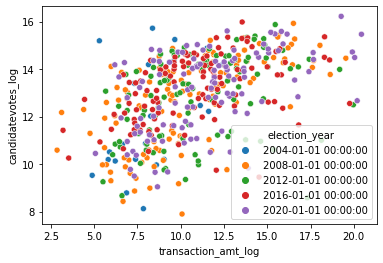

In [110]:
sns.scatterplot(data=df, x="transaction_amt_log", y="candidatevotes_log", hue="election_year")

# Linear regression

In [11]:
import statsmodels.formula.api as sm

In [43]:
model1 = 'candidatevotes ~ transaction_amt'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         candidatevotes   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.367
Date:                Sat, 06 Feb 2021   Prob (F-statistic):             0.0211
Time:                        16:30:34   Log-Likelihood:                -5486.1
No. Observations:                 351   AIC:                         1.098e+04
Df Residuals:                     349   BIC:                         1.098e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.491e+06    8.1e+04     

In [44]:
model1 = 'candidatevotes_log ~ transaction_amt_log'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:     candidatevotes_log   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     73.31
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           3.73e-16
Time:                        16:32:00   Log-Likelihood:                -490.84
No. Observations:                 347   AIC:                             985.7
Df Residuals:                     345   BIC:                             993.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.1646    

In [48]:
(1.10)**0.1394
#for 10% increase in transactions, candidate votes will increase by 1.3%

1.0133748933311284

In [40]:
model1 = 'transaction_amt ~ candidatevotes + party_simplified'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_amt   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.875
Date:                Sat, 06 Feb 2021   Prob (F-statistic):             0.0216
Time:                        15:48:25   Log-Likelihood:                -6855.3
No. Observations:                 351   AIC:                         1.372e+04
Df Residuals:                     348   BIC:                         1.373e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [73]:
model1 = 'candidatevotes ~ transaction_amt + party_simplified'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         candidatevotes   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.700
Date:                Sat, 06 Feb 2021   Prob (F-statistic):             0.0686
Time:                        18:20:02   Log-Likelihood:                -5486.1
No. Observations:                 351   AIC:                         1.098e+04
Df Residuals:                     348   BIC:                         1.099e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [38]:
model1 = 'candidatevotes_log  ~ transaction_amt_log + party_simplified + region'
lm1    = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                             OLS Regression Results                            
Dep. Variable:     transaction_amt_log   R-squared:                       0.304
Model:                             OLS   Adj. R-squared:                  0.291
Method:                  Least Squares   F-statistic:                     23.43
Date:                 Sat, 06 Feb 2021   Prob (F-statistic):           3.21e-33
Time:                         15:45:17   Log-Likelihood:                -1201.0
No. Observations:                  492   AIC:                             2422.
Df Residuals:                      482   BIC:                             2464.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
In

In [55]:
model1 = 'transaction_amt ~ state_x'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_amt   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.353
Date:                Sat, 06 Feb 2021   Prob (F-statistic):             0.0670
Time:                        17:34:13   Log-Likelihood:                -6823.5
No. Observations:                 351   AIC:                         1.375e+04
Df Residuals:                     300   BIC:                         1.395e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       939.5375   3.63e+07   2.59e-05

In [54]:
model1 = 'candidatevotes ~ state_x'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         candidatevotes   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     59.17
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          7.56e-128
Time:                        17:33:03   Log-Likelihood:                -5070.2
No. Observations:                 351   AIC:                         1.024e+04
Df Residuals:                     300   BIC:                         1.044e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.469e+05   2.46e+05      0.598

In [71]:
model1 = 'candidatevotes ~ transaction_amt + state_x'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         candidatevotes   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     61.95
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          5.53e-131
Time:                        18:05:23   Log-Likelihood:                -5059.1
No. Observations:                 351   AIC:                         1.022e+04
Df Residuals:                     299   BIC:                         1.042e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.469e+05   2.38e+05     

In [61]:
model1 = 'transaction_amt ~ party_simplified'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_amt   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.490
Date:                Sat, 06 Feb 2021   Prob (F-statistic):              0.115
Time:                        17:41:40   Log-Likelihood:                -6858.0
No. Observations:                 351   AIC:                         1.372e+04
Df Residuals:                     349   BIC:                         1.373e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [62]:
model1 = 'candidatevotes ~ party_simplified'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         candidatevotes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1664
Date:                Sat, 06 Feb 2021   Prob (F-statistic):              0.684
Time:                        17:42:01   Log-Likelihood:                -5488.7
No. Observations:                 351   AIC:                         1.098e+04
Df Residuals:                     349   BIC:                         1.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Second Best Model

In [69]:
model1 = 'candidatevotes ~ transaction_amt + state_x'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         candidatevotes   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     61.95
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          5.53e-131
Time:                        17:46:15   Log-Likelihood:                -5059.1
No. Observations:                 351   AIC:                         1.022e+04
Df Residuals:                     299   BIC:                         1.042e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.469e+05   2.38e+05     

## Best Model

In [68]:
model1 = 'candidatevotes  ~ transaction_amt * state_x'
lm1    = sm.ols(formula = model1, data = df_rep_dem).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         candidatevotes   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     39.72
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          1.34e-111
Time:                        17:45:57   Log-Likelihood:                -4990.4
No. Observations:                 351   AIC:                         1.018e+04
Df Residuals:                     249   BIC:                         1.058e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [114]:
df.columns

Index(['election_year', 'state_x', 'transaction_amt', 'totalspend_yr_st',
       'spend_share', 'party_simplified', 'candidatevotes', 'percentvote',
       'writein_sum', 'totalvotes', 'writein_mean', 'won', 'region',
       'battleground_bool', 'battleground_margin_avg_pct', 'shift_bool',
       'shift_int', 'bellweather_bool', 'bellweather_pct', 'swing',
       'democrat_lean_pct', 'percent_of_total_spend', 'spend_per_vote',
       'candidatevotes_log', 'transaction_amt_log'],
      dtype='object')

In [111]:
df.head()

election_year state_x  transaction_amt  totalspend_yr_st  spend_share  \
0    2004-01-01      CA          4310.65           8190.85    52.627627   
1    2004-01-01      CA          3880.20           8190.85    47.372373   
2    2004-01-01      CO           332.39            332.39   100.000000   
3    2004-01-01      DC        110613.46         118567.63    93.291449   
4    2004-01-01      DC          2547.27         118567.63     2.148369   

  party_simplified  candidatevotes  percentvote  writein_sum  totalvotes  ...  \
0         DEMOCRAT         6745485    54.305558            0    12421353  ...   
1            OTHER          166042     1.336746            1    12421353  ...   
2            OTHER           26643     1.251062            0     2129630  ...   
3         DEMOCRAT          202970    89.183869            0      227586  ...   
4            OTHER            3360     1.476365            1      227586  ...   

   shift_bool  shift_int bellweather_bool  bellweather_pct  swing  \
0           0          0                0            50.00      0   
1           0          0                0            50.00      0   
2           1          2                1            71.43      1   
3           0          0                0            50.00      0   
4           0          0                0            50.00      0   

   democrat_lean_pct  percent_of_total_spend  spend_per_vote  \
0             100.00                    2.57        0.063904   
1             100.00                   54.98        2.336879   
2              57.14                    1.48        1.247570   
3             100.00                   22.65       54.497443   
4             100.00                   13.59       75.811607   

   candidatevotes_log  transaction_amt_log  
0           15.724384             8.368844  
1           12.019996             8.263642  
2           10.190282             5.806309  
3           12.220813            11.613797  
4            8.119696             7.842777  

[5 rows x 25 columns]

In [112]:
df_rep.head()

election_year state_x  transaction_amt  totalspend_yr_st  spend_share  \
0    2004-01-01      DC          5406.90         118567.63     4.560182   
1    2004-01-01      FL           200.00            200.00   100.000000   
2    2004-01-01      MO          3416.66           3416.66   100.000000   
3    2004-01-01      VA         14970.53         262971.49     5.692834   
4    2008-01-01      AK            22.57            547.57     4.121847   

  party_simplified  candidatevotes  percentvote  writein_sum  totalvotes  ...  \
0       REPUBLICAN           21256     9.339766            0      227586  ...   
1       REPUBLICAN         3964522    52.097516            0     7609810  ...   
2       REPUBLICAN         1455713    53.296192            0     2731364  ...   
3       REPUBLICAN         1716959    53.731957            0     3195415  ...   
4       REPUBLICAN          193841    59.424520            0      326197  ...   

   shift_int  bellweather_bool bellweather_pct  swing  democrat_lean_pct  \
0          0                 0           50.00      0             100.00   
1          4                 1           85.71      1              42.86   
2          1                 1           71.43      1              28.57   
3          1                 0           71.43      0              42.86   
4          0                 0           50.00      0               0.00   

   percent_of_total_spend  spend_per_vote  candidatevotes_log  \
0                   22.53       25.437053            9.964394   
1                   63.23        0.005045           15.192896   
2                   14.24        0.234707           14.191006   
3                   63.23        0.871921           14.356065   
4                   67.86        0.011644           12.174794   

   transaction_amt_log    group  
0             8.595431  GROUP_D  
1             5.298317  GROUP_R  
2             8.136419  GROUP_M  
3             9.613839  GROUP_R  
4             3.116622  GROUP_D  

[5 rows x 26 columns]

In [113]:
df_dem.head()

election_year state_x  transaction_amt  totalspend_yr_st  spend_share  \
0    2004-01-01      CA          4310.65           8190.85    52.627627   
1    2004-01-01      DC        110613.46         118567.63    93.291449   
2    2004-01-01      IL        100300.00         100300.00   100.000000   
3    2004-01-01      NH           -20.00            941.52    -2.124225   
4    2004-01-01      NY         15650.21          15650.21   100.000000   

  party_simplified  candidatevotes  percentvote  writein_sum  totalvotes  ...  \
0         DEMOCRAT         6745485    54.305558            0    12421353  ...   
1         DEMOCRAT          202970    89.183869            0      227586  ...   
2         DEMOCRAT         2891550    54.823160            0     5274322  ...   
3         DEMOCRAT          340511    50.201611            0      678287  ...   
4         DEMOCRAT         4180755    56.130581            0     7448266  ...   

   shift_int  bellweather_bool bellweather_pct  swing  democrat_lean_pct  \
0          0                 0           50.00      0             100.00   
1          0                 0           50.00      0             100.00   
2          0                 0           50.00      0             100.00   
3          2                 1           71.43      0              14.29   
4          0                 0           50.00      0             100.00   

   percent_of_total_spend  spend_per_vote  candidatevotes_log  \
0                    2.57        0.063904           15.724384   
1                   22.65       54.497443           12.220813   
2                   17.84        3.468728           14.877303   
3                   12.19       -0.005874           12.738203   
4                   22.65        0.374339           15.246002   

   transaction_amt_log    group  
0             8.368844  GROUP_D  
1            11.613797  GROUP_D  
2            11.515921  GROUP_M  
3                  NaN  GROUP_D  
4             9.658240  GROUP_D  

[5 rows x 26 columns]